Neuromorphic engineering I

## Lab 5: Static Circuits: Transconductance Amplifier

Team member : Pietro Bonazzi

Group number: 

Date: 

-------------------------------------------------------------------------------------------------------------------

### Lab objectives

The objectives of this lab are to understand and characterize one of the most important circuit in analog IC design.

The experimental objectives are as follows:
1. To characterize a simple differential transconductance amplifier and understand its operation in terms of the behavior of the differential pair and the current mirror. Specifically, to understand the dependence of the output current on the differential input voltages.
2. To characterize single-stage 2-transistor “common-source” amplifier gain, and how it arises from transconductance and output impedance.

# 1 Prelab

## 1.1 Transconductance amplifier

* Now consider a simple differential transconductance amplifier which is built from a
differential pair and a current mirror. The output current should be equal to the the
difference of the two differential pair currents, i. e. $I_{out} = I_1 - I_2$. Is this statement
true? Justify your answer by stating your assumptions about transistor saturation and
drain conductance.

If we consider an n-TYPE TA , for this to be true we have to imply that the M1, M4 and M5 transistors are in saturation. M1 is where the V1 is an input and M4 and M5 are the mirror transistors. These assumption have some implications about the state of M3 (the ground transistor) which must be in saturation too. Finally, we get too a minimization problem for the $V_{out}$ to behave like intended. $V_{out} > \kappa (max(V_1,V_2)-V_b) + 4U_t$ and $V_{out} < V_{dd}-4U_t$

* Now consider the transconductance amplifier with the output open-circuited
  (i.e. no current flows into or out of the output node). Say $V_2$ is fixed
  at some voltage in the middle of the rails, e.g., $\frac{Vdd}{2}$. Explain what happens to the
  output voltage as $V_1$ is swept from below $V_2$ to
  above $V_2$ for a subthreshold bias. Discuss the current through the
  differential pair transistors and the current mirror, and the voltage on
  the internal node common to the differential pair transistors.  Try to keep
  the discussion concise.


$V_2 = \frac{Vdd}{2}$ $V_1 << V_2$ 
The forward current of M2 is >> than the fc of M1. The current mirror imposes $I_1 \approx I_2 \approx I_b/2$. So the $V_2$ does not drop and $V_out \approx V_s$ leading M2 out of saturation. 

$V_2 = \frac{Vdd}{2}$ $V_1 >> V_2$ 
The opposite is true. The forward current of M2 is << than the fc of M1. So $V_out$ goes all the way to $V_dd$ shutting off M4 and M5.

* What is the transconductance $g_m = \dfrac{\mathrm{d} I_{out}}{\mathrm{d} V_{in}}$, where
  $V_{in} \equiv V_1 - V_2$, in sub-threshold? How does it change if
  the circuit is operated super-threshold?


The term $g_m$ represents the transconductance of the amplifier and it's is equivalent to the ratio between the the current bias times kappa and 2 times the thermal voltage. If the circuit is operated above threshold $g_m=squareroot(\beta I_b)$

* Quantitatively, what is the relationship between transconductance, output
  resistance $r_o$, and voltage gain $A$ of a transconductance amplifier?


$r_o= 1/g_d\approx \frac{V_E}{I_b}$

subthreshold
- $A \approx \frac {\kappa V_E}{2U_T}$
- $g_m = \frac{\kappa I_b}{2U_T}$

$A \approx \frac{g_m V_E}{I_b} \approx g_m r_o$

abovethreshold
- $A \approx \sqrt {\frac {\beta}{I_b}} V_E$
- $g_m = \sqrt{\beta I_b}$

$A \approx \frac{g_m V_E}{I_b} \approx g_m r_o $

## 1.2 Wide-Range Transamp

* Draw the schematic of a wide-range transconductance amplifier and explain why it
does not have the simple 5-transistor transamp restriction on allowable output voltage.
You can either draw the schematic directly on the Jupyter notebook using the _schemdraw_ , or sketch it with pen and paper and paste a picture in a Markdown cell.

# 2 Setup

## 2.1 Connect the device

In [1]:
# import the necessary library to communicate with the hardware
import pyplane
import time
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# create a Plane object and open the communication
if 'p' not in locals():
    p = pyplane.Plane()
    try:
        p.open('/dev/ttyACM0')
    except RuntimeError as e:
        del p
        print(e)

In [3]:
p.get_firmware_version()

(1, 8, 4)

In [6]:
# Send a reset signal to the board, check if the LED blinks
p.reset(pyplane.ResetType.Soft)

time.sleep(0.5) 
# NOTE: You must send this request events every time you do a reset operetion, otherwise the recieved data is noisy.
# Because the class chip need to do handshake to get the communication correct.
p.request_events(1)

In [9]:
# Try to read something, make sure the chip responses
p.read_current(pyplane.AdcChannel.GO0_N)

1.6113281731122697e-07

In [ ]:
# If any of the above steps fail, delete the object, and restart the kernel

#del p

## 2.2 Setup C2F and voltage output buffer

In [10]:
# setup C2F
p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.C2F_HYS_P, \
    pyplane.Coach.BiasType.P, \
    pyplane.Coach.BiasGenMasterCurrent.I60pA, 100)])

time.sleep(0.2) 
p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.C2F_BIAS_P, \
    pyplane.Coach.BiasType.P, \
    pyplane.Coach.BiasGenMasterCurrent.I240nA, 255)])

time.sleep(0.2)
p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.C2F_PWLK_P, \
    pyplane.Coach.BiasType.P, \
    pyplane.Coach.BiasGenMasterCurrent.I240nA, 255)])

time.sleep(0.2)
p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.C2F_REF_L, \
    pyplane.Coach.BiasType.N, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, 255)])

time.sleep(0.2)
p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.C2F_REF_H, \
    pyplane.Coach.BiasType.P, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, 255)])

time.sleep(0.2)
# setup output rail-to-rail buffer
p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.RR_BIAS_P, \
    pyplane.Coach.BiasType.P, \
    pyplane.Coach.BiasGenMasterCurrent.I240nA, 255)])

# 3 N-Type 5T Transamp

## 3.0 Schematic and pin map

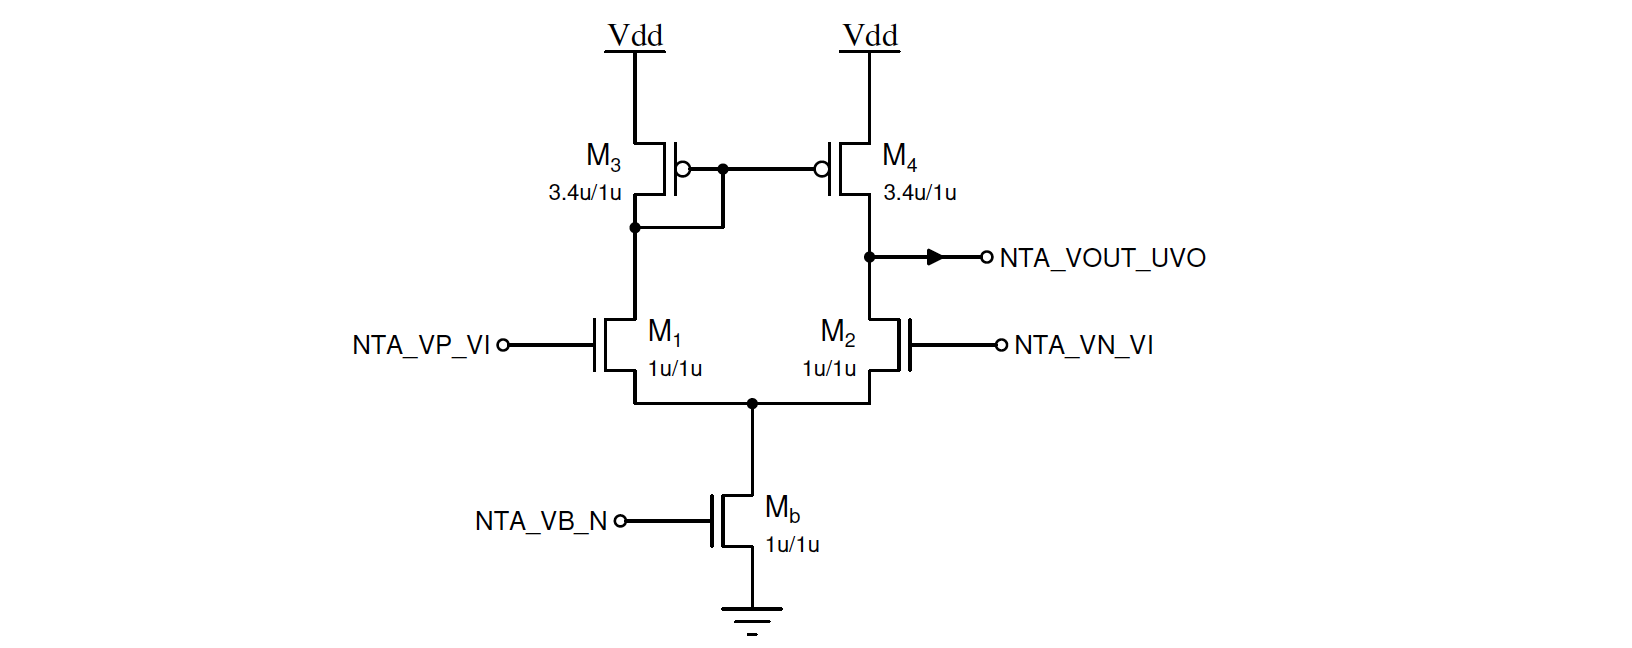

**$V_1$ = $V_p$ = NTA_VP_VI = AIN3**

**$V_2$ = $V_n$ = NTA_VN_VI = AIN4**

**$V_{out}$ = NTA_VOUT_UVO = ADC[13]**

**$I_{out}$ = $I_+ - I_-$ = NTA_IOUT_UO - NTA_IOUT_UBO = C2F[11] - C2F[12]**;   **Note that $I_+$ and $I_-$ is not $I_1$ and $I_2$.**

**Note: There are three identical NTA circuits with the same bias and input voltages, one with the output open-circuited and routed out at NTA_VOUT_UVO, the other two with $V_{out}$ fixed to 1V but $I_{out}$ routed out through N- and P- type current mirror at NTA_IOUT_UO and NTA_IOUT_UBO.**

## 3.1 Chip configuration

In [21]:
# configure N type TransAmp
p.send_coach_events([pyplane.Coach.generate_aerc_event( \
    pyplane.Coach.CurrentOutputSelect.SelectLine5, \
    pyplane.Coach.VoltageOutputSelect.SelectLine1, \
    pyplane.Coach.VoltageInputSelect.SelectLine2, \
    pyplane.Coach.SynapseSelect.NoneSelected, 0)])

## 3.2 Calibration of C2F channels

Here you need to calibrate NTA_IOUT_UO and NTA_IOUT_UBO in the same way as the last lab

### 3.2.1 NTA_IOUT_UO

* Set fixed voltages for $V_1$ and $V_2$

In [22]:
p.set_voltage(pyplane.DacChannel.AIN3,0.8) # V1 = 0.8
time.sleep(0.2) # settle time
p.set_voltage(pyplane.DacChannel.AIN4,0.2) # V2 = 0.2 

0.19882699847221375

Set voltages such that $V_1\gg V_2$.

* Data aquisition (Hint: use master current for $I_b$ = 30 nA)

In [17]:
import numpy as np
import time

calIout_UO_ex3 = np.arange(0,85,1) # bias current sweep range, fine value

c2f_Iout_UO_ex3 = []  # what you get is frequency

for n in range(len(calIout_UO_ex3)):
    
    # set bias
    p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.NTA_VB_N, \
    pyplane.Coach.BiasType.N, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, calIout_UO_ex3[n])])
    
    time.sleep(0.2) # settle time
    
    # read c2f values 
    c2f_Iout_UO_ex3_temp = p.read_c2f_output(0.1) 
    c2f_Iout_UO_ex3.append(c2f_Iout_UO_ex3_temp[11])
    
print(c2f_Iout_UO_ex3)


[2, 117, 216, 330, 435, 544, 639, 753, 852, 956, 1049, 1152, 1253, 1353, 1448, 1536, 1540, 1648, 1739, 1840, 1938, 2039, 2125, 2222, 2319, 2419, 2505, 2603, 2694, 2793, 2875, 2986, 3022, 3111, 3196, 3305, 3395, 3491, 3562, 3667, 3773, 3860, 3954, 4057, 4123, 4217, 4295, 4386, 4386, 4478, 4542, 4647, 4734, 4820, 4905, 4996, 5079, 5171, 5245, 5336, 5417, 5510, 5580, 5675, 5383, 5478, 5554, 5634, 5719, 5814, 5894, 5972, 6049, 6146, 6226, 6317, 6396, 6480, 6561, 6647, 6648, 6738, 6818, 6896, 6982]


* Plot

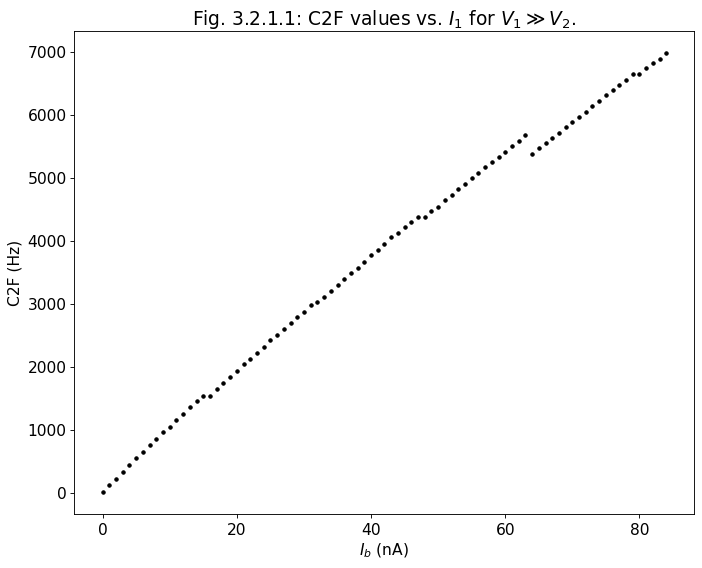

In [21]:
plt.figure(figsize=(10, 8), dpi=80)
plt.rcParams.update({'font.size': 14})
plt.title('Fig. 3.2.1.1: C2F values vs. $I_1$ for $V_1 \gg V_2$.')
plt.xlabel('$I_b$ (nA)')
plt.ylabel('C2F (Hz)')
plt.plot(c2f_Iout_UO_ex3, '.k')
plt.show()

* Save data

In [14]:
# if the data looks nice, save it!
data_Iout_UO_ex3_cal= [c2f_Iout_UO_ex3, calIout_UO_ex3]
# save to csv file
np.savetxt('./data/Lab5_data_321.csv', data_Iout_UO_ex3_cal, delimiter=',')

* Load data you saved

In [19]:
# load the saved data
c2f_Iout_UO_ex3_save,calIout_UO_ex3_save = np.loadtxt('./data/Lab5_data_321.csv',  delimiter=',') 

* C2f plot

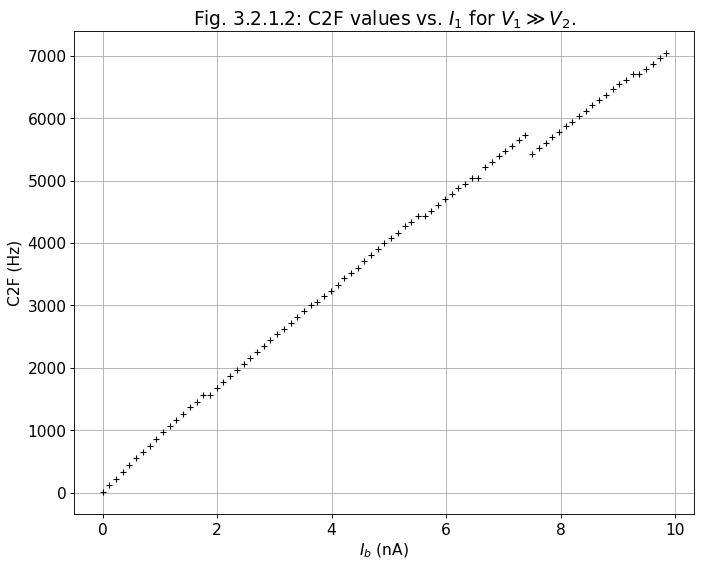

In [20]:
# C2f plot
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 14})

Iout_UO_ex3 = calIout_UO_ex3_save/256*30 

plt.figure(figsize=(10, 8), dpi=80)

plt.plot(Iout_UO_ex3,c2f_Iout_UO_ex3_save,'k+')

plt.xlabel('$I_b$ (nA)')
plt.ylabel('C2F (Hz)')
# plt.legend(['C2F'],prop={'size': 14})
plt.title('Fig. 3.2.1.2: C2F values vs. $I_1$ for $V_1 \gg V_2$.')
plt.grid()
plt.show()

Fig. 1 shows the C2F values obtained by sweeping the bias current over the range $I_b \in [0\text{nA},10\text{nA}]$, whereas $V_1 = 0.8\text{V}$ and $V_2 = 0.2\text{V}$. 

The values for $V_1$ and $V_2$ were chosen such that $V_1 \gg V_2$. For these values, the corresponding currents becomes $I_1 \approx I_b$ and $I_2 \approx 0$. The measured data can therefore be utilized to determine the mapping between $I_1 \approx I_b$ and the C2F measurements for the transconductance amplifier.

* Extract the function $I_+\left(f_+\right)$ (Hint: use higher order polynomial to increase accuracy)

The I1(f1) function of NTA_IOUT_UO is :
           2
5.425e-08 x + 0.001017 x + 0.06196


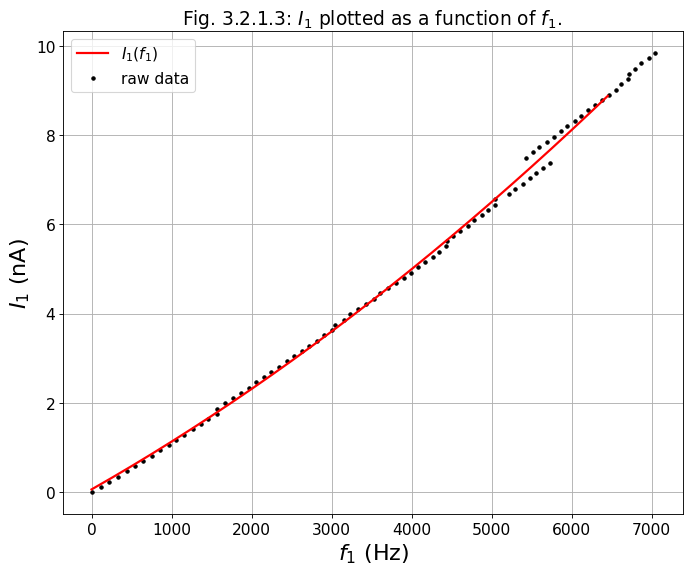

In [23]:
plt.figure(figsize=(10, 8), dpi=80)

# plot the raw data
raw_UO, = plt.plot(c2f_Iout_UO_ex3_save, Iout_UO_ex3, '.k') 

# data range you want to fit
low_bound = 2  
high_bound = 80

# fit polynomial to C2F (frequency) vs I data
a2, a1, a0 = np.polyfit(c2f_Iout_UO_ex3_save[low_bound:high_bound], Iout_UO_ex3[low_bound:high_bound],2)
coeff_uo=[a2, a1, a0]
np.savetxt('./data/Lab5_data_321a.csv', coeff_uo, delimiter=',')

# print(a0)
# print(a1)
# print(a2)

# Print out the function I(f) you got
I_freq = np.polyfit(c2f_Iout_UO_ex3_save[low_bound:high_bound], Iout_UO_ex3[low_bound:high_bound], 2)
print ('The I1(f1) function of NTA_IOUT_UO is :')
print (np.poly1d(I_freq))


# select frequency range that you want to plot
freq = np.arange(0, 6500, 50) 
# print(freq)

I1 = a2*freq**2 + a1*freq + a0   # function I(f), 

fit, = plt.plot(freq, I1, 'r-', linewidth=2) 

plt.xlabel('$f_1$ (Hz)', {'size':20})
plt.ylabel('$I_1$ (nA)', {'size':20})
plt.legend([fit, raw_UO], ['$I_1(f_1)$', 'raw data'],prop={'size': 14})
plt.title('Fig. 3.2.1.3: $I_1$ plotted as a function of $f_1$. ')
plt.grid()
plt.show()

### 3.2.2 NTA_IOUT_UBO

* Set fixed voltages for $V_1$ and $V_2$

In [24]:
p.set_voltage(pyplane.DacChannel.AIN3,0.2)
time.sleep(0.2) # settle time
p.set_voltage(pyplane.DacChannel.AIN4,0.8)

0.798827052116394

Set voltages such that $V_1\ll V_2$.

* Data aquisition (Hint: use master current for $I_b$ 30 nA)

In [25]:
import numpy as np
import time

calIout_UBO_ex3 = np.arange(0,85,1) # bias current sweep range

c2f_Iout_UBO_ex3 = []

for n in range(len(calIout_UBO_ex3)):
    
    # set bias
    p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.NTA_VB_N, \
    pyplane.Coach.BiasType.N, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, calIout_UBO_ex3[n])])
    
    time.sleep(0.2) # settle time
    
    # read c2f values 
    c2f_Iout_UBO_ex3_temp = p.read_c2f_output(0.1) 
    c2f_Iout_UBO_ex3.append(c2f_Iout_UBO_ex3_temp[12])
    
print(c2f_Iout_UBO_ex3)

[1, 104, 193, 295, 390, 494, 579, 674, 766, 867, 958, 1053, 1144, 1241, 1327, 1417, 1422, 1504, 1595, 1691, 1778, 1875, 1952, 2042, 2136, 2228, 2305, 2397, 2484, 2576, 2650, 2738, 2786, 2878, 2954, 3020, 3124, 3219, 3283, 3369, 3464, 3548, 3628, 3721, 3794, 3878, 3957, 4028, 4033, 4111, 4200, 4274, 4350, 4441, 4513, 4588, 4672, 4757, 4826, 4905, 4985, 5063, 5139, 5225, 4951, 5028, 5099, 5187, 5261, 5348, 5412, 5495, 5571, 5651, 5734, 5807, 5879, 5963, 6025, 6105, 6103, 6184, 6266, 6343, 6418]


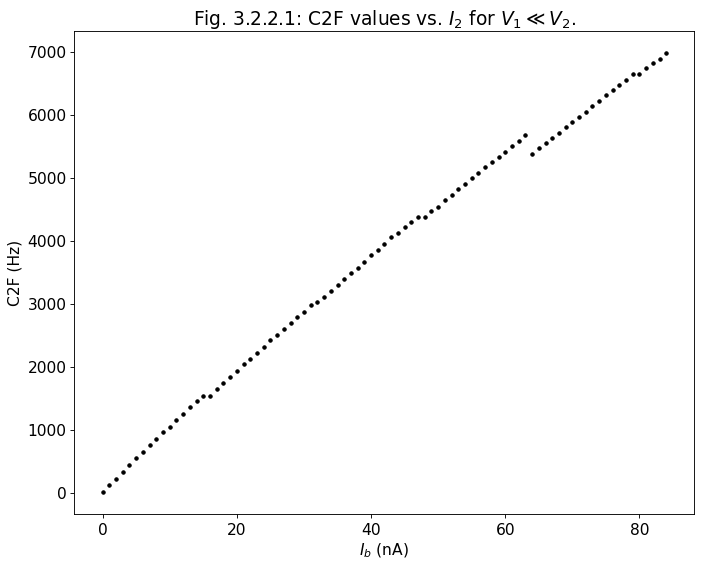

In [26]:
plt.figure(figsize=(10, 8), dpi=80)
plt.rcParams.update({'font.size': 14})
plt.xlabel('$I_b$ (nA)')
plt.ylabel('C2F (Hz)')
plt.title('Fig. 3.2.2.1: C2F values vs. $I_2$ for $V_1 \ll V_2$.')
plt.plot(c2f_Iout_UO_ex3, '.k')
plt.show()

* Save data

In [27]:
# if the data looks nice, save it!
data_Iout_UBO_ex3_cal= [c2f_Iout_UBO_ex3, calIout_UBO_ex3]
# save to csv file
np.savetxt('./data/Lab5_data_322.csv', data_Iout_UBO_ex3_cal, delimiter=',')

* Load data you saved

In [28]:
# load the saved data
c2f_Iout_UBO_ex3_save,calIout_UBO_ex3_save = np.loadtxt('./data/Lab5_data_322.csv',  delimiter=',') 

* C2f plot

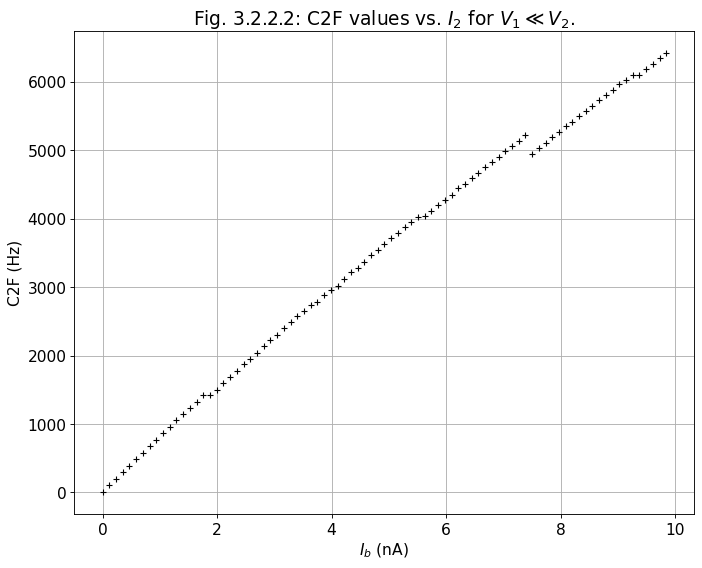

In [29]:
# C2f plot
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 14})

Iout_UBO_ex3 = calIout_UBO_ex3_save/256*30 

plt.figure(figsize=(10, 8), dpi=80)

plt.plot(Iout_UBO_ex3,c2f_Iout_UBO_ex3_save,'k+')

plt.xlabel('$I_b$ (nA)')
plt.ylabel('C2F (Hz)')
plt.title('Fig. 3.2.2.2: C2F values vs. $I_2$ for $V_1 \ll V_2$.')
plt.grid()
plt.show()

Fig. 1 shows the C2F values obtained by sweeping the bias current over the range $I_b \in [0\text{nA},10\text{nA}]$, whereas $V_1 = 0.8\text{V}$ and $V_2 = 0.2\text{V}$. 

The values for $V_1$ and $V_2$ were chosen such that $V_1 \gg V_2$. For these values, the corresponding currents becomes $I_1 \approx I_b$ and $I_2 \approx 0$. The measured data can therefore be utilized to determine the mapping between $I_1 \approx I_b$ and the C2F measurements for the transconductance amplifier.

* Extract the function $I_-\left(f_-\right)$ (Hint: use higher order polynomial to increase accuracy)

The I1(f1) function of NTA_IOUT_UO is :
           2
6.663e-08 x + 0.001107 x + 0.07966


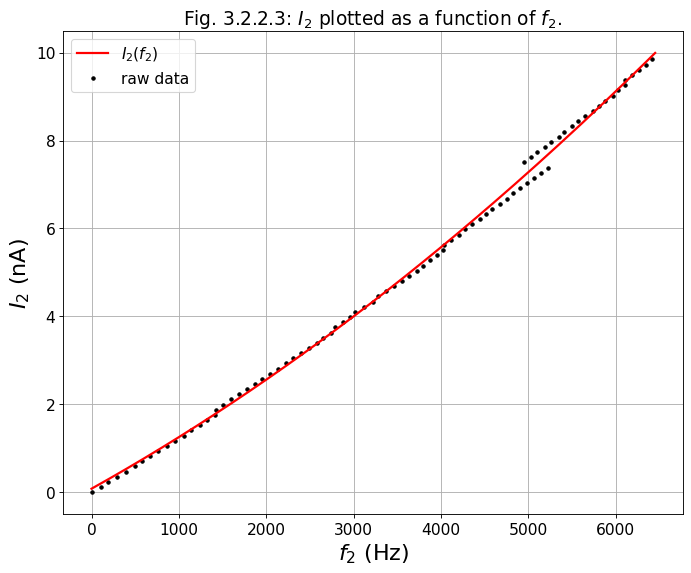

In [30]:
plt.figure(figsize=(10, 8), dpi=80)

# plot the raw data
raw_UBO, = plt.plot(c2f_Iout_UBO_ex3_save, Iout_UBO_ex3, '.k') 

# data range you want to fit
low_bound = 2  
high_bound = 80

# fit polynomial to C2F (frequency) vs I data
a2ubo, a1ubo, a0ubo = np.polyfit(c2f_Iout_UBO_ex3_save[low_bound:high_bound], Iout_UBO_ex3[low_bound:high_bound],2)
coeff_ubo=[a2ubo, a1ubo, a0ubo]
np.savetxt('./data/Lab5_data_322a.csv', coeff_ubo, delimiter=',')
# print(a0)
# print(a1)
# print(a2)

# Print out the function I(f) you got
I_freq = np.polyfit(c2f_Iout_UBO_ex3_save[low_bound:high_bound], Iout_UBO_ex3[low_bound:high_bound], 2)
print ('The I1(f1) function of NTA_IOUT_UO is :')
print (np.poly1d(I_freq))


# select frequency range that you want to plot
freq = np.arange(0, 6500, 50) 
# print(freq)

I1 = a2ubo*freq**2 + a1ubo*freq + a0ubo   # function I(f), 
fit, = plt.plot(freq, I1, 'r-', linewidth=2) 
plt.xlabel('$f_2$ (Hz)', {'size':20})
plt.ylabel('$I_2$ (nA)', {'size':20})
plt.legend([fit, raw_UBO], ['$I_2(f_2)$', 'raw data'],prop={'size': 14})
plt.title('Fig. 3.2.2.3: $I_2$ plotted as a function of $f_2$. ')
plt.grid()
plt.show()

## 3.3 Output voltage vs. input voltage

### 3.3.1 Basic measurement

* Set bias current $I_b$

In [31]:
 p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.NTA_VB_N, \
    pyplane.Coach.BiasType.N, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, 20)])

The bias current is set to

$I_b = w\dfrac{BG_{\text{fine}}}{256}I_{BG_{\text{master}}} = \dfrac{20}{256}\cdot 30\text{nA} \approx 2.344\text{nA}$.

* Set fixed value of $V_2$ (Hint: use get_set_voltage to get the real value set on the DAC)

In [32]:
p.set_voltage(pyplane.DacChannel.AIN4, 0.9) # V2 = 0.8
v2_real = p.get_set_voltage(pyplane.DacChannel.AIN4)
print("V2 is set to {} V".format(v2_real))

V2 is set to 0.8991203308105469 V


* Sweep $V_1$ and measure $V_{out}$ (Hint: use get_set_voltage to get the real value set on the DAC)

In [33]:
import numpy as np
import time

V1_sweep_ex3 = np.arange(0,1.8,0.05) # voltage V1 sweep range

V2_ex3_getset = p.get_set_voltage(pyplane.DacChannel.AIN4)

Vout_V1_sweep_ex3 = []
V1_sweep_ex3_getset = []

for n in range(len(V1_sweep_ex3)):
    
    p.set_voltage(pyplane.DacChannel.AIN3,V1_sweep_ex3[n]) #
    
    time.sleep(0.3) # settle time
    
    V1_sweep_ex3_getset.append(p.get_set_voltage(pyplane.DacChannel.AIN3))
    Vout_V1_sweep_ex3.append(p.read_voltage(pyplane.AdcChannel.AOUT13))
    
# print(V2_ex3_getset)
# print(V1_sweep_ex3_getset)
# print(Vout_V1_sweep_ex3)

* Plot raw data

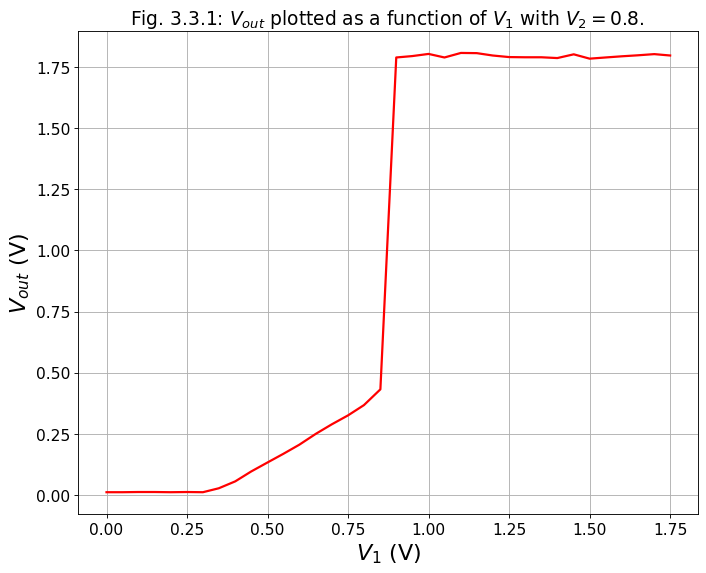

In [34]:
plt.figure(figsize=(10, 8), dpi=80)

plt.plot(V1_sweep_ex3_getset, Vout_V1_sweep_ex3, 'r-', linewidth=2) 

plt.xlabel('$V_1$ (V)', {'size':20})
plt.ylabel('$V_{out}$ (V)', {'size':20})
plt.title('Fig. 3.3.1: $V_{out}$ plotted as a function of $V_1$ with $V_2=0.8$. ')
plt.grid()
plt.show()

* Save raw data

In [39]:
# if the data looks nice, save it!
data_Iout_UBO_ex3_cal= [V1_sweep_ex3_getset, Vout_V1_sweep_ex3]
# save to csv file
np.savetxt('./data/Lab5_data_331.csv', data_Iout_UBO_ex3_cal, delimiter=',')

### 3.3.2 Different bias currents

* Repeat 3.3.1 with another two bias currents and compare the three curves

In [52]:
BGfine = [20,45,70] 

V1_sweep_ex3 = np.arange(0,1.8,0.05) # voltage V1 sweep range

for i in range(len(BGfine)) :
    
    p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.NTA_VB_N, \
    pyplane.Coach.BiasType.N, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, BGfine[i])])

    time.sleep(0.5)

    V2_ex3_getset = p.get_set_voltage(pyplane.DacChannel.AIN4)

    Vout_V1_sweep_ex3 = []
    V1_sweep_ex3_getset = []

    for n in range(len(V1_sweep_ex3)):
        
        p.set_voltage(pyplane.DacChannel.AIN3,V1_sweep_ex3[n]) #

        time.sleep(0.3) # settle time

        V1_sweep_ex3_getset.append(p.get_set_voltage(pyplane.DacChannel.AIN3))
        Vout_V1_sweep_ex3.append(p.read_voltage(pyplane.AdcChannel.AOUT13))
        

    data_Iout_UO_ex3_cal= [V1_sweep_ex3_getset, Vout_V1_sweep_ex3]
    ib=str(round(BGfine[i]*30/256,3))
    volt="0.9"
    filename="data/Lab5_data_332_"+ib+"_"+volt+".csv"
    np.savetxt(filename, data_Iout_UO_ex3_cal, delimiter=',')

In [35]:
from os import walk

def all_files(path) :
    names = []
    for files in walk(path):
        names.append(files)
    return names[0][2]

path="data"
filenames=all_files(path)
ex=[]
for i in range(len(filenames)) :
    if filenames[i][10:-14]=="332" :
        path="data/"+filenames[i]
        ex.append(path)
ex.sort()

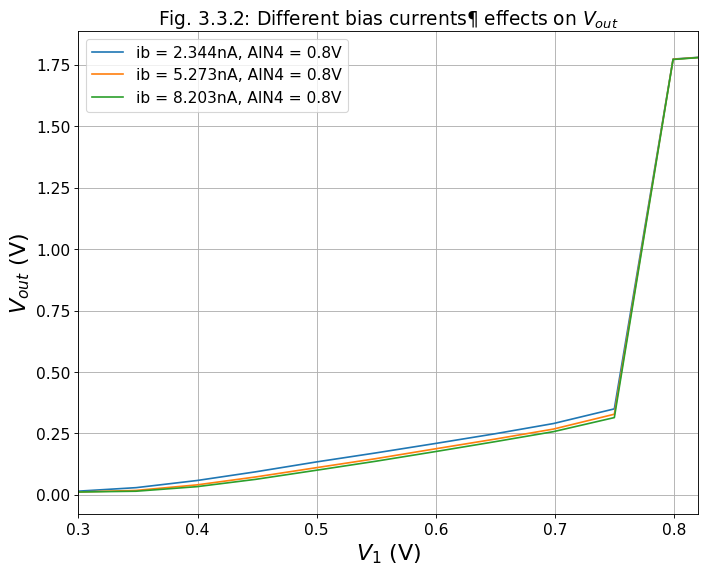

In [36]:
plt.figure(figsize=(10, 8), dpi=80)

for i in range(len(ex)):
    V1_,Vout_ = np.loadtxt(ex[i],  delimiter=',')
    ib_=ex[i][19:-8]
    vol_=ex[i][25:-4]
    label="ib = "+ib_+"nA"+", AIN4 = "+vol_+"V"
    plt.plot(V1_,Vout_, label=label)

plt.xlabel('$V_1$ (V)', {'size':20})
plt.ylabel('$V_{out}$ (V)', {'size':20})
plt.xlim([0.3,0.82])
plt.title('Fig. 3.3.2: Different bias currents¶ effects on $V_{out}$')
plt.grid()
plt.legend()
plt.show()

**To conclude your observations:**

For a fixed voltage in AIN4, if the current bias is larger, the output voltage is smaller, for a given voltage in AIN3 . 



### 3.3.3 Different fixed voltages $V_n$

* Repeat 3.3.1 with another two fixed voltages $V_2$ and compare the three curves

In [37]:
BGfine=[20]

voltage=[0.4, 0.9, 1.0] 

V1_sweep_ex3 = np.arange(0,1.8,0.05)

for i in range(len(BGfine)) :
    
    p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.NTA_VB_N, \
    pyplane.Coach.BiasType.N, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, BGfine[i])])
    
    time.sleep(0.3)
    
    for j in range (len(voltage)):
        
        p.set_voltage(pyplane.DacChannel.AIN4, voltage[j]) # V2 = 0.8
        v2_real = p.get_set_voltage(pyplane.DacChannel.AIN4)
        print("V2 is set to {} V".format(v2_real))
        
        V2_ex3_getset = p.get_set_voltage(pyplane.DacChannel.AIN4)

        Vout_V1_sweep_ex3 = []
        V1_sweep_ex3_getset = []

        for n in range(len(V1_sweep_ex3)):

            p.set_voltage(pyplane.DacChannel.AIN3,V1_sweep_ex3[n]) #

            time.sleep(0.3) # settle time

            V1_sweep_ex3_getset.append(p.get_set_voltage(pyplane.DacChannel.AIN3))
            Vout_V1_sweep_ex3.append(p.read_voltage(pyplane.AdcChannel.AOUT13))
        
        # if the data looks nice, save it!
        data_Iout_UO_ex3_cal= [V1_sweep_ex3_getset, Vout_V1_sweep_ex3]
        # save to csv file
        ib=str(round(BGfine[i]*30/256,3))
        volt=str(round(voltage[j],3))
        filename="data/Lab5_data_333_"+ib+"_"+volt+".csv"
        np.savetxt(filename, data_Iout_UO_ex3_cal, delimiter=',')  

V2 is set to 0.399413526058197 V
V2 is set to 0.8991203308105469 V
V2 is set to 0.9994136095046997 V


In [38]:
BGfine=[45]

for i in range(len(BGfine)) :
    
    p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.NTA_VB_N, \
    pyplane.Coach.BiasType.N, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, BGfine[i])])
    
    time.sleep(0.3)
    
    for j in range (len(voltage)):
        
        p.set_voltage(pyplane.DacChannel.AIN4, voltage[j]) # V2 = 0.8
        v2_real = p.get_set_voltage(pyplane.DacChannel.AIN4)
        print("V2 is set to {} V".format(v2_real))
        
        V2_ex3_getset = p.get_set_voltage(pyplane.DacChannel.AIN4)

        Vout_V1_sweep_ex3 = []
        V1_sweep_ex3_getset = []

        for n in range(len(V1_sweep_ex3)):

            p.set_voltage(pyplane.DacChannel.AIN3,V1_sweep_ex3[n]) #

            time.sleep(0.3) # settle time

            V1_sweep_ex3_getset.append(p.get_set_voltage(pyplane.DacChannel.AIN3))
            Vout_V1_sweep_ex3.append(p.read_voltage(pyplane.AdcChannel.AOUT13))
        
        # if the data looks nice, save it!
        data_Iout_UO_ex3_cal= [V1_sweep_ex3_getset, Vout_V1_sweep_ex3]
        # save to csv file
        ib=str(round(BGfine[i]*30/256,3))
        volt=str(round(voltage[j],3))
        filename="data/Lab5_data_333_"+ib+"_"+volt+".csv"
        np.savetxt(filename, data_Iout_UO_ex3_cal, delimiter=',')  

V2 is set to 0.399413526058197 V
V2 is set to 0.8991203308105469 V
V2 is set to 0.9994136095046997 V


In [23]:
BGfine=[85]

voltage=[0.4, 0.9, 1.0] 

V1_sweep_ex3 = np.arange(0,1.8,0.05)

for i in range(len(BGfine)) :
    
    p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.NTA_VB_N, \
    pyplane.Coach.BiasType.N, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, BGfine[i])])
    
    time.sleep(0.3)
    
    for j in range (len(voltage)):
        
        p.set_voltage(pyplane.DacChannel.AIN4, voltage[j]) # V2 = 0.8
        v2_real = p.get_set_voltage(pyplane.DacChannel.AIN4)
        print("V2 is set to {} V".format(v2_real))
        
        V2_ex3_getset = p.get_set_voltage(pyplane.DacChannel.AIN4)

        Vout_V1_sweep_ex3 = []
        V1_sweep_ex3_getset = []

        for n in range(len(V1_sweep_ex3)):

            p.set_voltage(pyplane.DacChannel.AIN3,V1_sweep_ex3[n]) #

            time.sleep(0.3) # settle time

            V1_sweep_ex3_getset.append(p.get_set_voltage(pyplane.DacChannel.AIN3))
            Vout_V1_sweep_ex3.append(p.read_voltage(pyplane.AdcChannel.AOUT13))
        
        # if the data looks nice, save it!
        data_Iout_UO_ex3_cal= [V1_sweep_ex3_getset, Vout_V1_sweep_ex3]
        # save to csv file
        ib=str(round(BGfine[i]*30/256,3))
        volt=str(round(voltage[j],3))
        filename="data/Lab5_data_333_"+ib+"_"+volt+".csv"
        np.savetxt(filename, data_Iout_UO_ex3_cal, delimiter=',')  

V2 is set to 0.399413526058197 V
V2 is set to 0.8991203308105469 V
V2 is set to 0.9994136095046997 V


In [24]:
from os import walk

def all_files(path) :
    names = []
    for files in walk(path):
        names.append(files)
    return names[0][2]

path="data"
filenames=all_files(path)
ex=[]
for i in range(len(filenames)) :
    if filenames[i][10:-14]=="333" :
        path="data/"+filenames[i]
        ex.append(path)
ex.sort()
ex

['data/Lab5_data_333_2.344_0.4.csv',
 'data/Lab5_data_333_2.344_0.9.csv',
 'data/Lab5_data_333_2.344_1.0.csv',
 'data/Lab5_data_333_5.273_0.4.csv',
 'data/Lab5_data_333_5.273_0.9.csv',
 'data/Lab5_data_333_5.273_1.0.csv',
 'data/Lab5_data_333_9.961_0.4.csv',
 'data/Lab5_data_333_9.961_0.9.csv',
 'data/Lab5_data_333_9.961_1.0.csv']

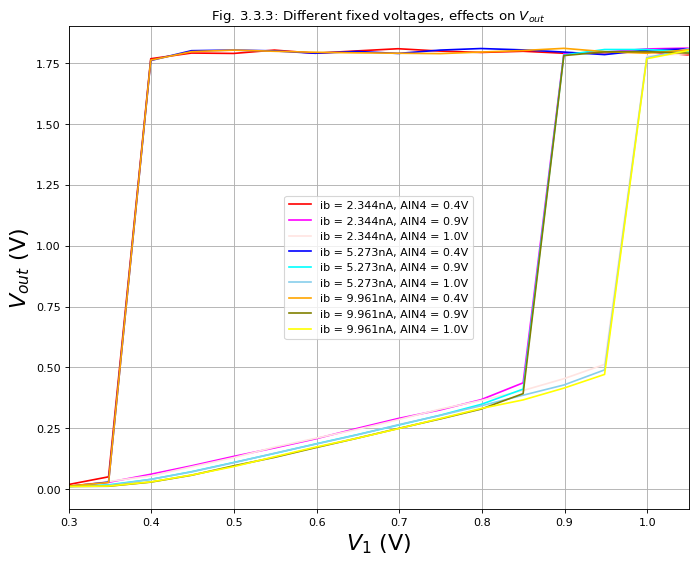

In [25]:
plt.figure(figsize=(10, 8), dpi=80)
colors = ['red', 'magenta', "mistyrose", "blue", "aqua", "skyblue","orange", "olive", "yellow" ]

for i in range(len(ex)):
    V1_,Vout_ = np.loadtxt(ex[i],  delimiter=',')
    ib_=ex[i][19:-8]
    vol_=ex[i][25:-4]
    label="ib = "+ib_+"nA"+", AIN4 = "+vol_+"V"
    plt.plot(V1_,Vout_, label=label, color = colors[i])

plt.xlabel('$V_1$ (V)', {'size':20})
plt.ylabel('$V_{out}$ (V)', {'size':20})
plt.xlim([0.3,1.05])
plt.title('Fig. 3.3.3: Different fixed voltages, effects on $V_{out}$')
plt.grid()
plt.legend()
plt.show()

**To conclude your observations:**

If the fixed voltage is low (around 0.4V), it's enough to have a voltage $V_1$ of around 3.5V to amplify $V_{out}$ . This observation is valid for all current bias tested. 



## 3.4 Output current vs. input voltage

### 3.4.1 Basic measurement

* Set bias current $I_b$

In [26]:
 p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.NTA_VB_N, \
    pyplane.Coach.BiasType.N, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, 80)])

Switch bias current back to $I_b = 9.96\text{nA}$.

* Assign common mode voltage $V_{cm}$

In [27]:
Vcm_ex3 = 0.7 # Vcm = 0.7V

* Sweep differential voltage $V_{diff}$ and measure $I_{out}$ (Hint: use get_set_voltage to get the real value set on the DAC)

In [19]:
V1_sweep_ex3 = np.arange(0.6, 1.2, 0.01) # voltage V1 sweep range

V2_ex3 = []
V1_sweep_ex3_getset = []
V2_ex3_getset = []
c2f_Iout_UO_Vcm_ex3 = []
c2f_Iout_UBO_Vcm_ex3 = []

for n in range(len(V1_sweep_ex3)):
    
    # calculate V2 via Vcm and V1
    V2_ex3.append(2*Vcm_ex3-V1_sweep_ex3[n])
    
    p.set_voltage(pyplane.DacChannel.AIN3,V1_sweep_ex3[n]) #
    p.set_voltage(pyplane.DacChannel.AIN4,V2_ex3[n]) #

    time.sleep(0.2) # settle time
    
    V1_sweep_ex3_getset.append(p.get_set_voltage(pyplane.DacChannel.AIN3))
    V2_ex3_getset.append(p.get_set_voltage(pyplane.DacChannel.AIN4))
    
    # read c2f values 
    c2f_Iout_ex3_temp = p.read_c2f_output(0.1)
    c2f_Iout_UO_Vcm_ex3.append(c2f_Iout_ex3_temp[11])
    c2f_Iout_UBO_Vcm_ex3.append(c2f_Iout_ex3_temp[12])

* Save raw data

In [20]:
# if the data looks nice, save it!
data_Iout_Vcm09_ex3 = [V1_sweep_ex3_getset,V2_ex3_getset,c2f_Iout_UO_Vcm_ex3,c2f_Iout_UBO_Vcm_ex3]
# save to csv file
np.savetxt('./data/Lab5_data_341.csv', data_Iout_Vcm09_ex3, delimiter=',')

* Plot raw data (C2F frequncy vs. 𝑉𝑑𝑖𝑓𝑓)

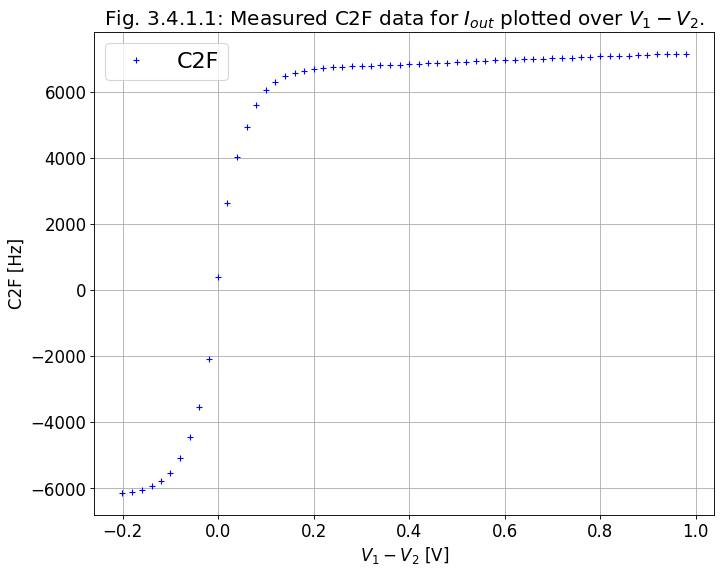

In [66]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 15})

V1_sweep_Iout_Vcm09_ex3_getset,V2_Iout_Vcm09_ex3_getset,c2f_Iout_UO_Vcm09_ex3,c2f_Iout_UBO_Vcm09_ex3 = np.loadtxt('./data/Lab5_data_341.csv', delimiter=',')

Vdiff_Vcm09 = V1_sweep_Iout_Vcm09_ex3_getset-V2_Iout_Vcm09_ex3_getset
#print(Vdiff_Vcm09)
c2f_Iout_Vcm09 = c2f_Iout_UO_Vcm09_ex3 - c2f_Iout_UBO_Vcm09_ex3
#print(c2f_Iout_Vcm09)

plt.figure(figsize=(10, 8), dpi=80)
plt.plot(Vdiff_Vcm09,c2f_Iout_Vcm09,'b+')

plt.xlabel('$V_1-V_2$ [V]')
plt.ylabel('C2F [Hz]')
plt.legend(['C2F'],prop={'size': 20})
plt.title('Fig. 3.4.1.1: Measured C2F data for $I_{out}$ plotted over $V_1-V_2$.')
plt.grid()
plt.show()

* Convert c2f frenquncy to current and plot. You may need the factors a2, a1, a0 that you get when fitting the I(f) function in section 3 to convert frequency to current.

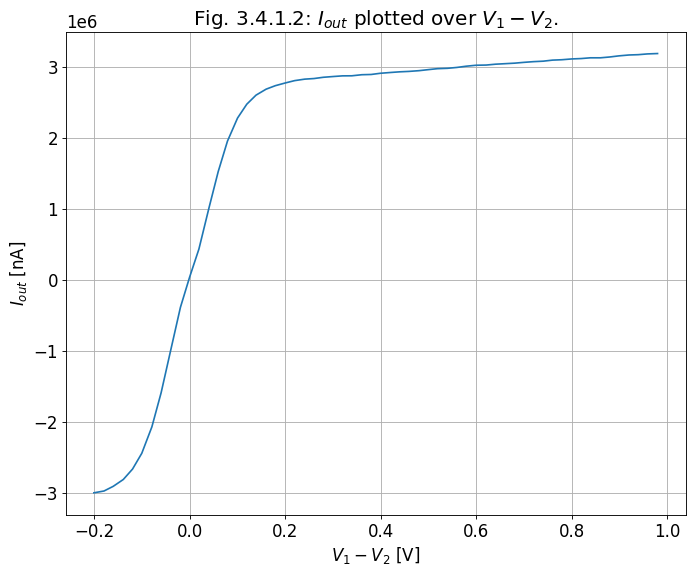

In [67]:
a0,a1,a2 = np.loadtxt('./data/Lab5_data_321a.csv',  delimiter=',') 
a0ubo,a1ubo,a2ubo = np.loadtxt('./data/Lab5_data_322a.csv',  delimiter=',') 
V1_sweep_ex3_getset,V2_ex3_getset,c2f_Iout_UO_Vcm_ex3,c2f_Iout_UBO_Vcm_ex3 = np.loadtxt('./data/Lab5_data_341.csv',  delimiter=',') 

Vdiff_Vcm09 = V1_sweep_Iout_Vcm09_ex3_getset-V2_Iout_Vcm09_ex3_getset
I_1 = a2*c2f_Iout_UO_Vcm09_ex3**2+a1*c2f_Iout_UO_Vcm09_ex3+a0
I_2 = a2ubo*c2f_Iout_UBO_Vcm09_ex3**2+a1ubo*c2f_Iout_UBO_Vcm09_ex3+a0ubo

plt.figure(figsize=(10, 8), dpi=80)
plt.plot(Vdiff_Vcm09,I_1-I_2)
plt.xlabel('$V_1-V_2$ [V]')
plt.ylabel('$I_{out}$ [nA]')
plt.title('Fig. 3.4.1.2: $I_{out}$ plotted over $V_1-V_2$.')
plt.grid()
plt.show()

* Compute transconductance

In [68]:
Ib=85*30/256 #nA
k=a2-a2ubo #
Ut=25.85 #mV

gm=Ib*k/(2*Ut) 

print("Transconductance = ", gm)

Transconductance =  -0.0034092888820349042


* Explain any asymmetries in the amplifier’s I-V curve and the offset voltage in terms of mismatch between devices in the mirror and differential pair.
Do you think we can distinguish the effects of mismatch in the current mirror and in the differential pair?
The main point here is to recognize that there will be non-idealities, to understand where they arise.

The asymmetries and offsets are due to the different lenghts of the two transistors sets in the current mirror circuit and in the differential pair's part. The mirror devices are said to have 3.4 ratios . Whereas the device in the differential pair have a ratio of 1. Meaning that the device in the mirror are larger, more reliable in terms of voltage offsets and have a smaller early voltage compared to the transistors in the DP.

### 3.4.2 Different bias currents

* Repeat 3.4.1 with another two bias currents and compare the three curves

In [19]:
Vcm_ex3 = 0.7

BGfine = [20, 70] 

for i in range(len(BGfine)) :
    
    p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.NTA_VB_N, \
    pyplane.Coach.BiasType.N, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, BGfine[i])])

    time.sleep(0.3)

    V1_sweep_ex3 = np.arange(0.6, 1.2, 0.01) # voltage V1 sweep range

    V2_ex3 = []
    V1_sweep_ex3_getset = []
    V2_ex3_getset = []
    c2f_Iout_UO_Vcm_ex3 = []
    c2f_Iout_UBO_Vcm_ex3 = []

    for n in range(len(V1_sweep_ex3)):

        # calculate V2 via Vcm and V1
        V2_ex3.append(2*Vcm_ex3-V1_sweep_ex3[n])

        p.set_voltage(pyplane.DacChannel.AIN3,V1_sweep_ex3[n]) #
        p.set_voltage(pyplane.DacChannel.AIN4,V2_ex3[n]) #

        time.sleep(0.3) # settle time

        V1_sweep_ex3_getset.append(p.get_set_voltage(pyplane.DacChannel.AIN3))
        V2_ex3_getset.append(p.get_set_voltage(pyplane.DacChannel.AIN4))

        # read c2f values 
        c2f_Iout_ex3_temp = p.read_c2f_output(0.1)
        c2f_Iout_UO_Vcm_ex3.append(c2f_Iout_ex3_temp[11])
        c2f_Iout_UBO_Vcm_ex3.append(c2f_Iout_ex3_temp[12])
        
    # if the data looks nice, save it!
    data_Iout_Vcm09_ex3 = [V1_sweep_ex3_getset,V2_ex3_getset,c2f_Iout_UO_Vcm_ex3,c2f_Iout_UBO_Vcm_ex3]
    # save to csv file
    ib=str(round(BGfine[i]*30/256,2))
    volt=str(round(Vcm_ex3,2))
    filename="data/Lab5_data_342_"+ib+"_vcm_"+volt+".csv"
    np.savetxt(filename, data_Iout_Vcm09_ex3, delimiter=',')   

In [14]:
data=["data/Lab5_data_341.csv","data/Lab5_data_342_2.34_vcm_0.7.csv", "data/Lab5_data_342_8.2_vcm_0.7.csv"]

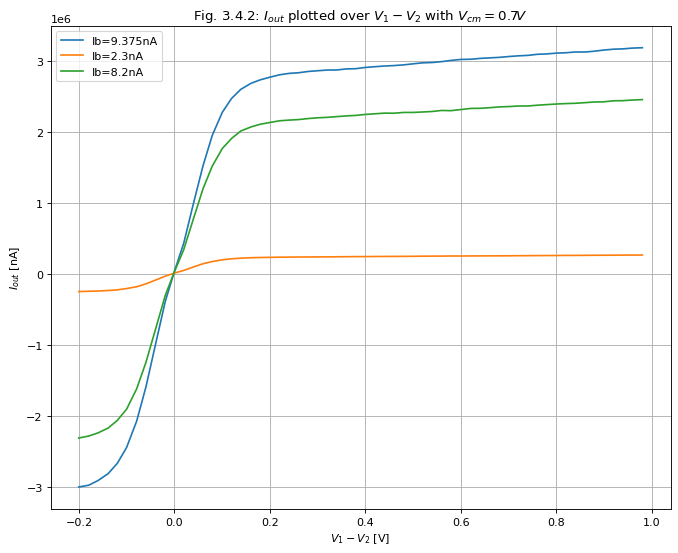

In [15]:
plt.figure(figsize=(10, 8), dpi=80)

a0,a1,a2 = np.loadtxt('./data/Lab5_data_321a.csv',  delimiter=',') 
a0ubo,a1ubo,a2ubo = np.loadtxt('./data/Lab5_data_322a.csv',  delimiter=',') 

V1_sweep_ex3_getset,V2_ex3_getset,c2f_Iout_UO_Vcm_ex3,c2f_Iout_UBO_Vcm_ex3 = np.loadtxt(data[0],  delimiter=',')
Vdiff_Vcm09 = V1_sweep_ex3_getset-V2_ex3_getset
I_1 = a2*c2f_Iout_UO_Vcm_ex3**2+a1*c2f_Iout_UO_Vcm_ex3+a0
I_2 = a2ubo*c2f_Iout_UBO_Vcm_ex3**2+a1ubo*c2f_Iout_UBO_Vcm_ex3+a0ubo
plt.plot(Vdiff_Vcm09,I_1-I_2, label="Ib=9.375nA")

V1_sweep_ex3_getset,V2_ex3_getset,c2f_Iout_UO_Vcm_ex3,c2f_Iout_UBO_Vcm_ex3 = np.loadtxt(data[1],  delimiter=',')
Vdiff_Vcm09 = V1_sweep_ex3_getset-V2_ex3_getset
I_1 = a2*c2f_Iout_UO_Vcm_ex3**2+a1*c2f_Iout_UO_Vcm_ex3+a0
I_2 = a2ubo*c2f_Iout_UBO_Vcm_ex3**2+a1ubo*c2f_Iout_UBO_Vcm_ex3+a0ubo
plt.plot(Vdiff_Vcm09,I_1-I_2,label="Ib=2.3nA")

V1_sweep_ex3_getset,V2_ex3_getset,c2f_Iout_UO_Vcm_ex3,c2f_Iout_UBO_Vcm_ex3 = np.loadtxt(data[2],  delimiter=',')
Vdiff_Vcm09 = V1_sweep_ex3_getset-V2_ex3_getset
I_1 = a2*c2f_Iout_UO_Vcm_ex3**2+a1*c2f_Iout_UO_Vcm_ex3+a0
I_2 = a2ubo*c2f_Iout_UBO_Vcm_ex3**2+a1ubo*c2f_Iout_UBO_Vcm_ex3+a0ubo
plt.plot(Vdiff_Vcm09,I_1-I_2, label="Ib=8.2nA")

plt.xlabel('$V_1-V_2$ [V]')
plt.ylabel('$I_{out}$ [nA]')
plt.title('Fig. 3.4.2: $I_{out}$ plotted over $V_1-V_2$ with $V_{cm} = 0.7V$')
plt.grid()
plt.legend()
plt.show()

**To conclude your observations:**

A larger current bias is produces more extreme and larger sigmoid functions



### 3.4.3 Different common mode voltages

* Repeat 3.4.1 with another two common mode voltages and compare the three curves

In [29]:
p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
pyplane.Coach.BiasAddress.NTA_VB_N, \
pyplane.Coach.BiasType.N, \
pyplane.Coach.BiasGenMasterCurrent.I30nA, 85)])

time.sleep(0.5)

Vcm_list = [0.4, 0.5, 0.6]

for i in range(len(Vcm_list)) :
    
    Vcm_ex3=Vcm_list[i]
    
    if i ==0 :  
        V1_sweep_ex3 = np.arange(0.0, 0.6, 0.01) # voltage V1 sweep range
    
    elif i==1:
        V1_sweep_ex3 = np.arange(0.2, 0.8, 0.01) # voltage V1 sweep range
    
    else    :    
        V1_sweep_ex3 = np.arange(0.4, 1.0, 0.01) # voltage V1 sweep range
        
    V2_ex3 = []
    V1_sweep_ex3_getset = []
    V2_ex3_getset = []
    c2f_Iout_UO_Vcm_ex3 = []
    c2f_Iout_UBO_Vcm_ex3 = []

    for n in range(len(V1_sweep_ex3)):

        # calculate V2 via Vcm and V1
        V2_ex3.append(2*Vcm_ex3-V1_sweep_ex3[n])

        p.set_voltage(pyplane.DacChannel.AIN3,V1_sweep_ex3[n]) #
        p.set_voltage(pyplane.DacChannel.AIN4,V2_ex3[n]) #

        time.sleep(0.2) # settle time

        V1_sweep_ex3_getset.append(p.get_set_voltage(pyplane.DacChannel.AIN3))
        V2_ex3_getset.append(p.get_set_voltage(pyplane.DacChannel.AIN4))

        # read c2f values 
        c2f_Iout_ex3_temp = p.read_c2f_output(0.1)
        c2f_Iout_UO_Vcm_ex3.append(c2f_Iout_ex3_temp[11])
        c2f_Iout_UBO_Vcm_ex3.append(c2f_Iout_ex3_temp[12])
        
    # if the data looks nice, save it!
    data_Iout_Vcm09_ex3 = [V1_sweep_ex3_getset,V2_ex3_getset,c2f_Iout_UO_Vcm_ex3,c2f_Iout_UBO_Vcm_ex3]
    # save to csv file
    ib=str(round(85*30/256,2))
    volt=str(round(Vcm_ex3,2))
    filename="data/Lab5_data_343_"+ib+"_vcm_"+volt+".csv"
    np.savetxt(filename, data_Iout_Vcm09_ex3, delimiter=',')   

In [37]:
data=['data/Lab5_data_343_9.96_vcm_0.4.csv','data/Lab5_data_343_9.96_vcm_0.5.csv', 'data/Lab5_data_343_9.96_vcm_0.6.csv', 'data/Lab5_data_343_9.96_vcm_0.7.csv']

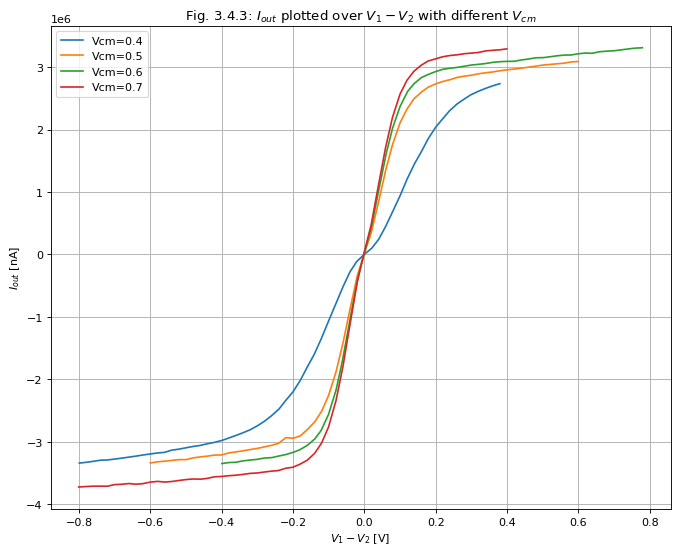

In [38]:
plt.figure(figsize=(10, 8), dpi=80)

a0,a1,a2 = np.loadtxt('./data/Lab5_data_321a.csv',  delimiter=',') 
a0ubo,a1ubo,a2ubo = np.loadtxt('./data/Lab5_data_322a.csv',  delimiter=',') 

for i in range(len(data)):
    V1_sweep_ex3_getset,V2_ex3_getset,c2f_Iout_UO_Vcm_ex3,c2f_Iout_UBO_Vcm_ex3 = np.loadtxt(data[i],  delimiter=',')
    Vdiff_Vcm09 = V1_sweep_ex3_getset-V2_ex3_getset
    I_1 = a2*c2f_Iout_UO_Vcm_ex3**2+a1*c2f_Iout_UO_Vcm_ex3+a0
    I_2 = a2ubo*c2f_Iout_UBO_Vcm_ex3**2+a1ubo*c2f_Iout_UBO_Vcm_ex3+a0ubo
    plt.plot(Vdiff_Vcm09,I_1-I_2)
    

plt.xlabel('$V_1-V_2$ [V]')
plt.ylabel('$I_{out}$ [nA]')
plt.title('Fig. 3.4.3: $I_{out}$ plotted over $V_1-V_2$ with different $V_{cm}$')
plt.grid()
plt.legend(["Vcm=0.4", "Vcm=0.5", "Vcm=0.6", "Vcm=0.7"])
plt.show()

**To conclude your observations:**

If the Vcm is increased the sigmoid shape becomes more apparent. Because the assumptions of saturation in the transistors hold better under these conditions. 



**What do you observe when the common mode voltage $V_{cm}$ is too small (e.g. 0.2V or 0.3V)?**
**Does it have a sigmoid shape? If not, try to explain why.**

It does not . When the common voltage is very low the assumptions of the circuits (saturations) break . 


# 4 P-Type 5T Transamp

## 4.0 Schematic and pin map

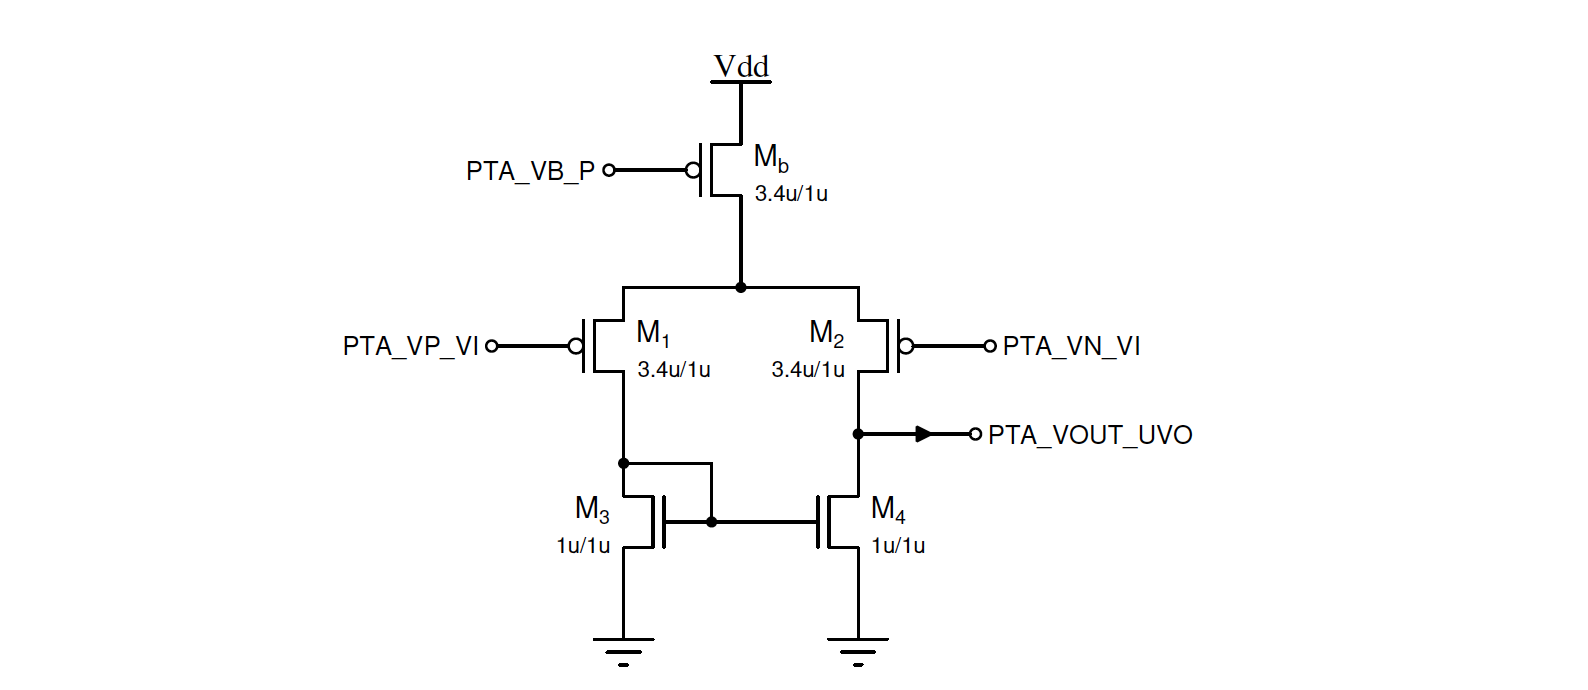

**$V_1$ = $V_p$ = PTA_VP_VI = AIN7**

**$V_2$ = $V_n$ = PTA_VN_VI = AIN8**

**$V_{out}$ = PTA_VOUT_UVO = ADC[12]**

**$I_{out}$ = $I_+ - I_-$ = PTA_IOUT_UO - PTA_IOUT_UBO = C2F[13] - C2F[14]**

**Note: There are three identical PTA circuits with the same bias and input voltages, one with the output open-circuited and routed out at PTA_VOUT_UVO, the other two with $V_{out}$ fixed to 1V but $I_{out}$ routed out through N- and P- type current mirror at PTA_IOUT_UO and PTA_IOUT_UBO.**

## 4.1 Chip configuration

In [11]:
# configure P type TransAmp
p.send_coach_events([pyplane.Coach.generate_aerc_event( \
    pyplane.Coach.CurrentOutputSelect.SelectLine5, \
    pyplane.Coach.VoltageOutputSelect.SelectLine1, \
    pyplane.Coach.VoltageInputSelect.SelectLine1, \
    pyplane.Coach.SynapseSelect.NoneSelected, 0)])

## 4.2 Calibration of C2F channels

Here you need to calibrate PTA_IOUT_UO and PTA_IOUT_UBO in the same way as the last lab. **Notice the W/L ratio of 3.4 of Mb**.

In [21]:
# Notice the W/L ratio of 3.4 of Mb when setting Ib.
p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.PTA_VB_P, \
    pyplane.Coach.BiasType.P, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, 25)])

### 4.2.1 PTA_IOUT_UO

* Set fixed voltages for $V_1$ and $V_2$

In [42]:
p.set_voltage(pyplane.DacChannel.AIN7, 1.6)
p.set_voltage(pyplane.DacChannel.AIN8, 1.0)

0.9994136095046997

Set $V_1\gg V_2$.

* Data aquisition (Hint: use master current 30 nA)

In [44]:
import numpy as np
import time

calIout_UO_ex4 = np.arange(0,85,1) # bias current sweep range, fine value

c2f_Iout_UO_ex4 = []  # what you get is frequency

for n in range(len(calIout_UO_ex4)):
    
    # set bias
    p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.PTA_VB_P, \
    pyplane.Coach.BiasType.P, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, calIout_UO_ex4[n])])
    
    time.sleep(0.2) # settle time
    
    # read c2f values 
    c2f_Iout_UO_ex4_temp = p.read_c2f_output(0.1) 
    c2f_Iout_UO_ex4.append(c2f_Iout_UO_ex4_temp[13])
    
print(c2f_Iout_UO_ex4)


[1, 205, 380, 571, 716, 904, 1068, 1251, 1318, 1502, 1667, 1845, 1985, 2164, 2326, 2507, 2509, 2694, 2854, 3029, 3178, 3353, 3504, 3677, 3753, 3921, 4077, 4244, 4383, 4555, 4711, 4885, 4915, 5095, 5242, 5420, 5552, 5726, 5874, 6053, 6112, 6286, 6437, 6602, 6737, 6908, 7063, 7226, 7239, 7406, 7555, 7722, 7855, 8023, 8180, 8346, 8415, 8580, 8723, 8889, 9020, 9177, 9322, 9495, 9450, 9621, 9783, 9928, 10077, 10219, 10366, 10525, 10602, 10773, 10917, 11065, 11191, 11351, 11497, 11666, 11660, 11815, 11979, 12124, 12245]


* Plot

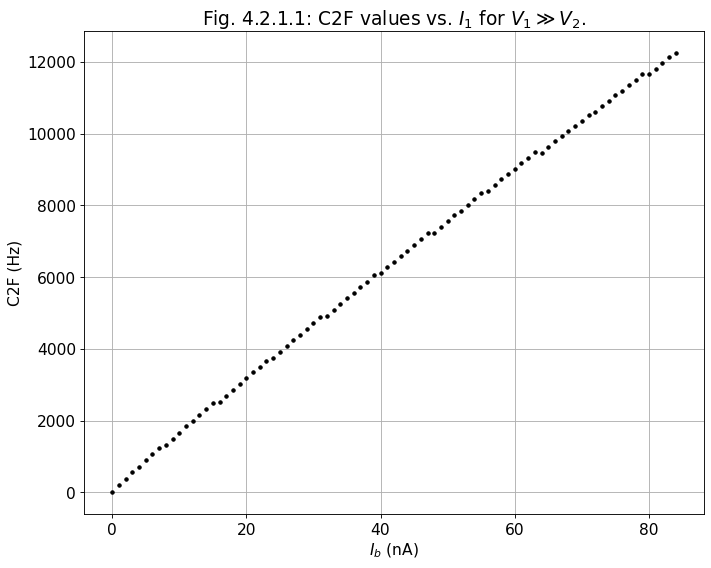

In [46]:
plt.figure(figsize=(10, 8), dpi=80)
plt.rcParams.update({'font.size': 14})
plt.xlabel('$I_b$ (nA)')
plt.ylabel('C2F (Hz)')
plt.title('Fig. 4.2.1.1: C2F values vs. $I_1$ for $V_1 \gg V_2$.')
plt.plot(c2f_Iout_UO_ex4, '.k')
plt.grid()
plt.show()

* Save data

In [47]:
# if the data looks nice, save it!
data_Iout_UO_ex4_cal= [c2f_Iout_UO_ex4, calIout_UO_ex4]
# save to csv file
np.savetxt('./data/Lab5_data_421.csv', data_Iout_UO_ex4_cal, delimiter=',')

* Extract the function $I_+\left(f_+\right)$ (Hint: use higher order polynomial to increase accuracy)

The I1(f1) function of NTA_IOUT_UO is :
          2
5.44e-09 x + 0.0007414 x - 0.07772


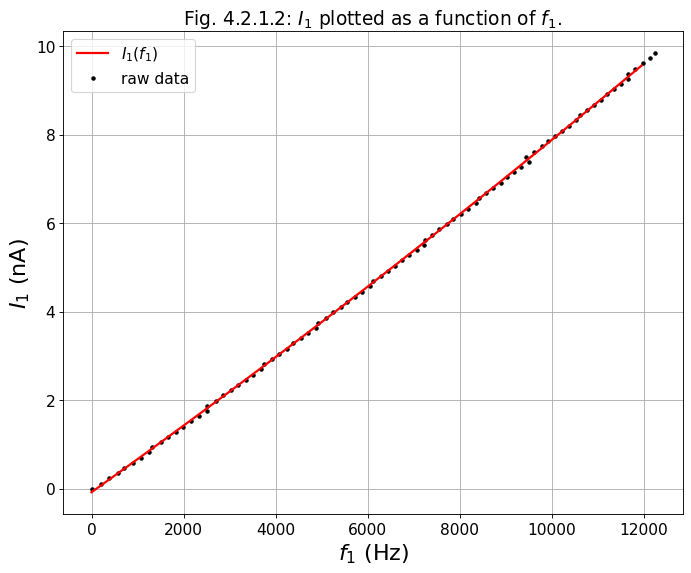

In [54]:
c2f_Iout_UO_ex4_save,calIout_UO_ex4_save = np.loadtxt('./data/Lab5_data_421.csv',  delimiter=',') 
Iout_UO_ex4 = calIout_UO_ex4_save/256*30 

plt.figure(figsize=(10, 8), dpi=80)

# plot the raw data
raw_UO, = plt.plot(c2f_Iout_UO_ex4_save, Iout_UO_ex4, '.k') 

# data range you want to fit
low_bound = 2  
high_bound = 80

# fit polynomial to C2F (frequency) vs I data
a2, a1, a0 = np.polyfit(c2f_Iout_UO_ex4_save[low_bound:high_bound], Iout_UO_ex4[low_bound:high_bound],2)
coeff_uo=[a2, a1, a0]
np.savetxt('./data/Lab5_data_421a.csv', coeff_uo, delimiter=',')

# print(a0)
# print(a1)
# print(a2)

# Print out the function I(f) you got
I_freq = np.polyfit(c2f_Iout_UO_ex4_save[low_bound:high_bound], Iout_UO_ex4[low_bound:high_bound], 2)
print ('The I1(f1) function of NTA_IOUT_UO is :')
print (np.poly1d(I_freq))


# select frequency range that you want to plot
freq = np.arange(0, 12000, 50) 
# print(freq)

I1 = a2*freq**2 + a1*freq + a0   # function I(f), 

fit, = plt.plot(freq, I1, 'r-', linewidth=2) 

plt.xlabel('$f_1$ (Hz)', {'size':20})
plt.ylabel('$I_1$ (nA)', {'size':20})
plt.legend([fit, raw_UO], ['$I_1(f_1)$', 'raw data'],prop={'size': 14})
plt.title('Fig. 4.2.1.2: $I_1$ plotted as a function of $f_1$. ')
plt.grid()
plt.show()

### 4.2.2 PTA_IOUT_UBO

* Set fixed voltages for $V_1$ and $V_2$

In [51]:
p.set_voltage(pyplane.DacChannel.AIN7, 1.0)
p.set_voltage(pyplane.DacChannel.AIN8, 1.6)

1.5994136333465576

Set $V_1\ll V_2$.

In [52]:
import numpy as np
import time

calIout_UBO_ex4 = np.arange(0,85,1) # bias current sweep range, fine value

c2f_Iout_UBO_ex4 = []  # what you get is frequency

for n in range(len(calIout_UBO_ex4)):
    
    # set bias
    p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.PTA_VB_P, \
    pyplane.Coach.BiasType.P, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, calIout_UBO_ex4[n])])
    
    
    time.sleep(0.2) # settle time
    
    # read c2f values 
    c2f_Iout_UBO_ex4_temp = p.read_c2f_output(0.1) 
    c2f_Iout_UBO_ex4.append(c2f_Iout_UBO_ex4_temp[14])
    
print(c2f_Iout_UBO_ex4)


[2, 327, 616, 931, 1173, 1480, 1755, 2055, 2164, 2460, 2727, 3019, 3245, 3544, 3800, 4079, 4079, 4345, 4588, 4865, 5068, 5336, 5578, 5832, 5927, 6197, 6424, 6680, 6878, 7126, 7353, 7602, 7656, 7905, 8122, 8372, 8561, 8791, 9008, 9248, 9333, 9566, 9784, 10009, 10191, 10427, 10627, 10855, 10870, 11088, 11294, 11519, 11690, 11900, 12104, 12318, 12387, 12615, 12804, 13015, 13188, 13391, 13581, 13786, 13762, 13967, 14154, 14365, 14535, 14741, 14925, 15118, 15200, 15389, 15569, 15774, 15922, 16118, 16309, 16488, 16497, 16692, 16887, 17139, 17358]


* Plot

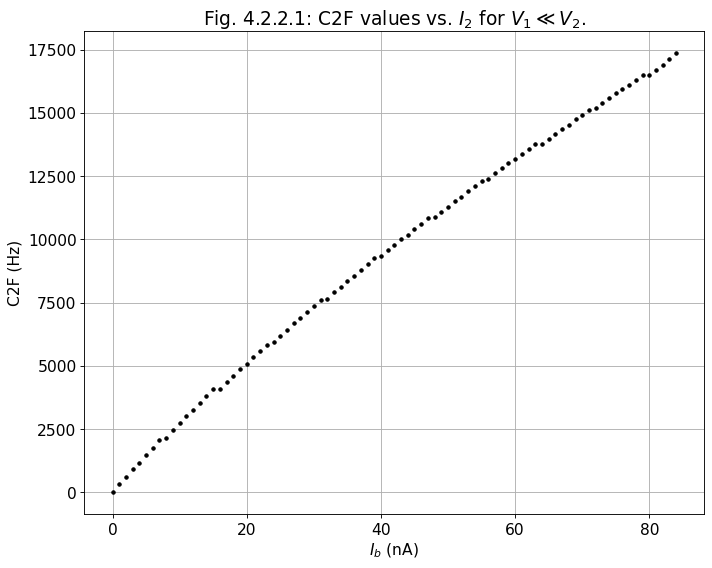

In [63]:
plt.figure(figsize=(10, 8), dpi=80)
plt.rcParams.update({'font.size': 14})
plt.xlabel('$I_b$ (nA)')
plt.ylabel('C2F (Hz)')
plt.title('Fig. 4.2.2.1: C2F values vs. $I_2$ for $V_1 \ll V_2$.')
plt.plot(c2f_Iout_UBO_ex4, '.k')
plt.grid()
plt.show()

* Save data

In [57]:
# if the data looks nice, save it!
data_Iout_UBO_ex4_cal= [c2f_Iout_UBO_ex4, calIout_UBO_ex4]
# save to csv file
np.savetxt('./data/Lab5_data_422.csv', data_Iout_UBO_ex4_cal, delimiter=',')

* Extract the function $I_-\left(f_-\right)$ (Hint: use higher order polynomial to increase accuracy)

The I2(f2) function of NTA_IOUT_UBO is :
           2
8.723e-09 x + 0.000423 x - 0.0486


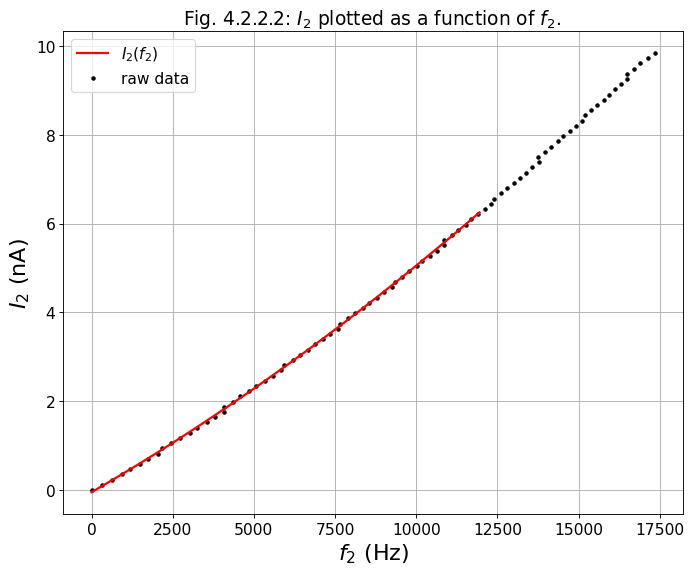

In [59]:
c2f_Iout_UBO_ex4_save,calIout_UBO_ex4_save = np.loadtxt('./data/Lab5_data_422.csv',  delimiter=',') 
Iout_UBO_ex4 = calIout_UBO_ex4_save/256*30 

plt.figure(figsize=(10, 8), dpi=80)

# plot the raw data
raw_UBO, = plt.plot(c2f_Iout_UBO_ex4_save, Iout_UBO_ex4, '.k') 

# data range you want to fit
low_bound = 2  
high_bound = 80

# fit polynomial to C2F (frequency) vs I data
a2, a1, a0 = np.polyfit(c2f_Iout_UBO_ex4_save[low_bound:high_bound], Iout_UBO_ex4[low_bound:high_bound],2)
coeff_ubo=[a2, a1, a0]
np.savetxt('./data/Lab5_data_422a.csv', coeff_ubo, delimiter=',')

# print(a0)
# print(a1)
# print(a2)

# Print out the function I(f) you got
I_freq = np.polyfit(c2f_Iout_UBO_ex4_save[low_bound:high_bound], Iout_UBO_ex4[low_bound:high_bound], 2)
print ('The I2(f2) function of NTA_IOUT_UBO is :')
print (np.poly1d(I_freq))


# select frequency range that you want to plot
freq = np.arange(0, 12000, 50) 
# print(freq)

I2 = a2*freq**2 + a1*freq + a0   # function I(f), 

fit, = plt.plot(freq, I2, 'r-', linewidth=2) 

plt.xlabel('$f_2$ (Hz)', {'size':20})
plt.ylabel('$I_2$ (nA)', {'size':20})
plt.legend([fit, raw_UO], ['$I_2(f_2)$', 'raw data'],prop={'size': 14})
plt.title('Fig. 4.2.2.2: $I_2$ plotted as a function of $f_2$. ')
plt.grid()
plt.show()

## 4.3 Output voltage vs. input voltage

### 4.3.1 Basic measurement

* Set bias current $I_b$

In [22]:
p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.PTA_VB_P, \
    pyplane.Coach.BiasType.P, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, 25)])

The bias current is set to (Notice the W/L ratio of 3.4 of Mb.)

$I_b = w\dfrac{BG_{\text{fine}}}{256}I_{BG_{\text{master}}} = 3.4 \dfrac{25}{256}\cdot 30\text{nA} = 9.96 \text{nA}$.

* Set fixed value of $V_2$ (Hint: use get_set_voltage to get the real value set on the DAC)

In [23]:
p.set_voltage(pyplane.DacChannel.AIN8, 0.9)

0.8991203308105469

Set $V_2= 0.9\text{V}$.

* Sweep $V_1$ and measure $V_{out}$ (Hint: use get_set_voltage to get the real value set on the DAC)

In [24]:
import numpy as np
import time

V1_sweep_ex4 = np.arange(0,1.8,0.05) # voltage V1 sweep range

V2_ex4_getset = p.get_set_voltage(pyplane.DacChannel.AIN8)

Vout_V1_sweep_ex4 = []
V1_sweep_ex4_getset = []

for n in range(len(V1_sweep_ex4)):
    
    p.set_voltage(pyplane.DacChannel.AIN7,V1_sweep_ex4[n]) #
    
    time.sleep(0.5) # settle time
    
    V1_sweep_ex4_getset.append(p.get_set_voltage(pyplane.DacChannel.AIN7))
    Vout_V1_sweep_ex4.append(p.read_voltage(pyplane.AdcChannel.AOUT12))

    
#print(V2_ex4_getset)
#print(V1_sweep_ex4_getset)
#print(Vout_V1_sweep_ex4)

* Plot raw data

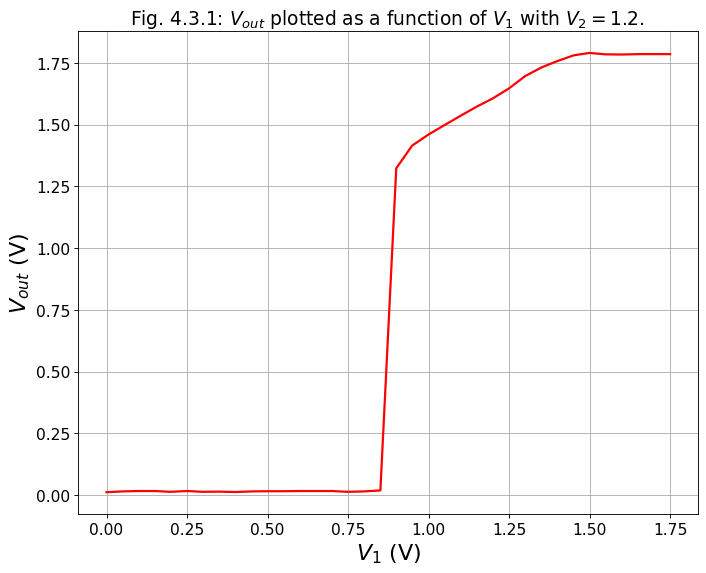

In [25]:
plt.figure(figsize=(10, 8), dpi=80)
plt.rcParams.update({'font.size': 14})
plt.plot(V1_sweep_ex4_getset, Vout_V1_sweep_ex4, 'r-', linewidth=2) 

plt.xlabel('$V_1$ (V)', {'size':20})
plt.ylabel('$V_{out}$ (V)', {'size':20})
plt.title('Fig. 4.3.1: $V_{out}$ plotted as a function of $V_1$ with $V_2=1.2$. ')
plt.grid()
plt.show()

* Save raw data

In [26]:
# if the data looks nice, save it!
data_Iout_UO_ex4_cal= [V1_sweep_ex4_getset, Vout_V1_sweep_ex4]
# save to csv file
np.savetxt('./data/Lab5_data_431.csv', data_Iout_UO_ex4_cal, delimiter=',')

### 4.3.2 Different bias currents (**optional**)

* Repeat 4.3.1 with another two bias currents and compare the three curves

Switch bias current from $I_b = ???\text{nA}$ in the basic measurement to $I_b = ???\text{nA}$.

**To conclude your observations:**

xxxxxxxx



### 4.3.3 Different fixed voltages $V_n$ (**optional**)

* Repeat 4.3.1 with another two fixed voltages $V_2$ and compare the three curves

In [27]:
 p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.PTA_VB_P, \
    pyplane.Coach.BiasType.P, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, 25)])
    
time.sleep(0.3)

In [30]:
voltage=[0.4, 0.9, 1.0] 

for j in range (len(voltage)):

    p.set_voltage(pyplane.DacChannel.AIN8, voltage[j]) # V2 = 0.8
    v2_real = p.get_set_voltage(pyplane.DacChannel.AIN8)
    print("V2 is set to {} V".format(v2_real))

    V2_ex4_getset = p.get_set_voltage(pyplane.DacChannel.AIN8)

    Vout_V1_sweep_ex4 = []
    V1_sweep_ex4_getset = []

    for n in range(len(V1_sweep_ex4)):

        p.set_voltage(pyplane.DacChannel.AIN7,V1_sweep_ex4[n]) #

        time.sleep(0.5) # settle time

        V1_sweep_ex4_getset.append(p.get_set_voltage(pyplane.DacChannel.AIN7))
        Vout_V1_sweep_ex4.append(p.read_voltage(pyplane.AdcChannel.AOUT12))

    
    
    # if the data looks nice, save it!
    data_Iout_UO_ex4_cal= [V1_sweep_ex4_getset, Vout_V1_sweep_ex4]
    # save to csv file
    ib=str(round(3.4*25*30/256,2))
    volt=str(round(voltage[j],2))
    filename="data/Lab5_data_433_"+ib+"_"+volt+".csv"
    np.savetxt(filename, data_Iout_UO_ex4_cal, delimiter=',')  

V2 is set to 0.399413526058197 V
V2 is set to 0.8991203308105469 V
V2 is set to 0.9994136095046997 V


**To conclude your observations:**

xxxxxxxx



## 4.4 Output current vs. input voltage

### 4.4.1 Basic measurement

* Set bias current $I_b$

In [12]:
 p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.PTA_VB_P, \
    pyplane.Coach.BiasType.P, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, 25)])

Bias current is switched back to $I_b = 9.96 \text{nA}$.

* Assign common mode voltage $V_{cm}$

In [13]:
Vcm_ex4 = 0.9

Common mode voltage is set to $V_{cm}= 0.5 \text{V}$.

* Sweep differential voltage $V_{diff}$ and measure $I_{out}$ (Hint: use get_set_voltage to get the real value set on the DAC)

In [14]:
V1_sweep_ex4 = np.arange(0.2, 1.6, 0.01) # voltage V1 sweep range

V2_ex4 = []
V1_sweep_ex4_getset = []
V2_ex4_getset = []
c2f_Iout_UO_Vcm_ex4 = []
c2f_Iout_UBO_Vcm_ex4 = []

for n in range(len(V1_sweep_ex4)):
    
    # calculate V2 via Vcm and V1
    V2_ex4.append(2*Vcm_ex4-V1_sweep_ex4[n])
    
    p.set_voltage(pyplane.DacChannel.AIN7,V1_sweep_ex4[n]) #
    p.set_voltage(pyplane.DacChannel.AIN8,V2_ex4[n]) #

    time.sleep(0.2) # settle time
    
    V1_sweep_ex4_getset.append(p.get_set_voltage(pyplane.DacChannel.AIN7))
    V2_ex4_getset.append(p.get_set_voltage(pyplane.DacChannel.AIN8))
    
    # read c2f values 
    c2f_Iout_ex4_temp = p.read_c2f_output(0.1)
    c2f_Iout_UO_Vcm_ex4.append(c2f_Iout_ex4_temp[13])
    c2f_Iout_UBO_Vcm_ex4.append(c2f_Iout_ex4_temp[14])

* Save raw data

In [15]:
## if the data looks nice, save it!
data_Iout_Vcm09_ex4 = [V1_sweep_ex4_getset,V2_ex4_getset,c2f_Iout_UO_Vcm_ex4,c2f_Iout_UBO_Vcm_ex4]
# save to csv file
np.savetxt('./data/Lab5_data_441.csv', data_Iout_Vcm09_ex4, delimiter=',')

* Plot raw data (C2F )

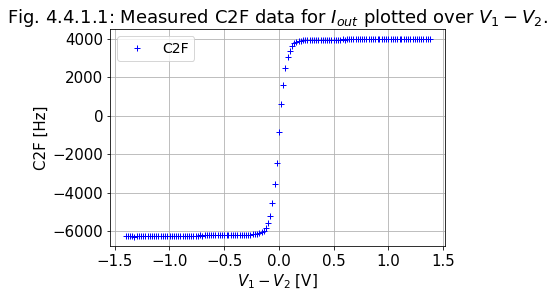

In [69]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 15})

V1_sweep_Iout_Vcm09_ex4_getset,V2_Iout_Vcm09_ex4_getset,c2f_Iout_UO_Vcm09_ex4,c2f_Iout_UBO_Vcm09_ex4 = np.loadtxt('./data/Lab5_data_441.csv', delimiter=',')

Vdiff_Vcm09 = V1_sweep_Iout_Vcm09_ex4_getset-V2_Iout_Vcm09_ex4_getset
#print(Vdiff_Vcm09)
c2f_Iout_Vcm09 = c2f_Iout_UO_Vcm09_ex4 - c2f_Iout_UBO_Vcm09_ex4
#print(c2f_Iout_Vcm09)

plt.plot(Vdiff_Vcm09,c2f_Iout_Vcm09,'b+')

plt.xlabel('$V_1-V_2$ [V]')
plt.ylabel('C2F [Hz]')
plt.legend(['C2F'],prop={'size': 14})
plt.title('Fig. 4.4.1.1: Measured C2F data for $I_{out}$ plotted over $V_1-V_2$.')
plt.grid()
plt.show()

* Convert rate to current and plot

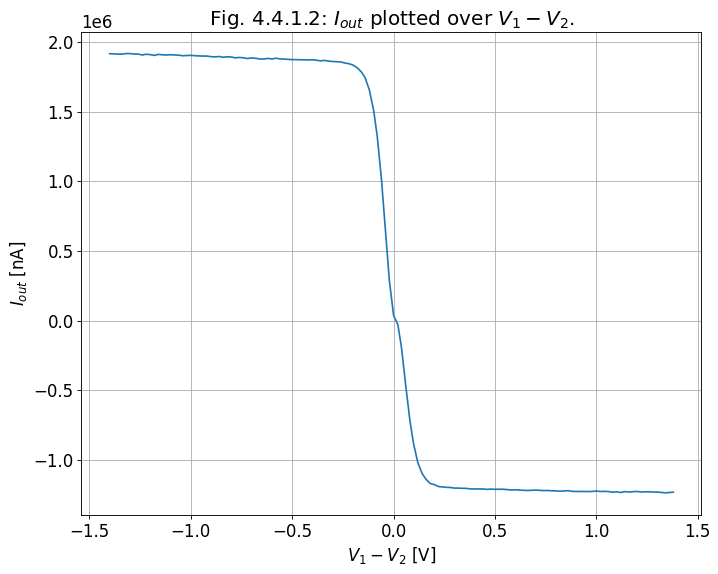

In [70]:
a0,a1,a2 = np.loadtxt('./data/Lab5_data_421a.csv',  delimiter=',') 
a0ubo,a1ubo,a2ubo = np.loadtxt('./data/Lab5_data_422a.csv',  delimiter=',') 
V1_sweep_ex4_getset,V2_ex4_getset,c2f_Iout_UO_Vcm_ex4,c2f_Iout_UBO_Vcm_ex4 = np.loadtxt('./data/Lab5_data_441.csv',  delimiter=',') 

Vdiff_Vcm09 = V1_sweep_Iout_Vcm09_ex4_getset-V2_Iout_Vcm09_ex4_getset
I_1 = a2*c2f_Iout_UO_Vcm09_ex4**2+a1*c2f_Iout_UO_Vcm09_ex4+a0
I_2 = a2ubo*c2f_Iout_UBO_Vcm09_ex4**2+a1ubo*c2f_Iout_UBO_Vcm09_ex4+a0ubo

plt.figure(figsize=(10, 8), dpi=80)
plt.rcParams.update({'font.size': 15})
plt.plot(Vdiff_Vcm09,I_1-I_2)
plt.xlabel('$V_1-V_2$ [V]')
plt.ylabel('$I_{out}$ [nA]')
plt.title('Fig. 4.4.1.2: $I_{out}$ plotted over $V_1-V_2$.')
plt.grid()
plt.show()

* Compute transconductance

In [71]:
Ib=3.4*25*30/256 #nA
k=a2-a2ubo #
Ut=25.85 #mV

gm=Ib*k/(2*Ut) 

print("Transconductance = ", gm)

Transconductance =  -0.005609128004854387


* Explain any asymmetries in the amplifier’s I-V curve and the offset voltage in terms of mismatch between devices in the mirror and differential pair, and the Early effect.


The mirror devices are said to have 1/1 ratios . Whereas the device in the differential pair have a 3.4 ratio . Meaning that the device in DP is larger, more reliable in terms of voltage offsets and have a smaller early voltage compared to the transistors in the mirror. 

### 4.4.2 Different bias currents (**optional**)

* Repeat 4.4.1 with another two bias currents and compare the three curves

Switch bias current from $I_b= ??? \text{nA}$ in the basic measurement to $I_b = ???\text{nA}$.

**To conclude your observations:**

xxxxxxxx



### 4.4.3 Different common mode voltages (**optional**)

* Repeat 4.4.1 with another two common mode voltages and compare the three curves

The common mode voltage was changed from $V_{cm} = ??? \text{V}$ to $V_{cm} = ??? \text{V}$.

Switch bias current back to $I_b= ??? \text{nA}$.

**To conclude your observations:**

xxxxxxxx



# 5 Wide-range Transamp

## 5.0 Schematic and pin map

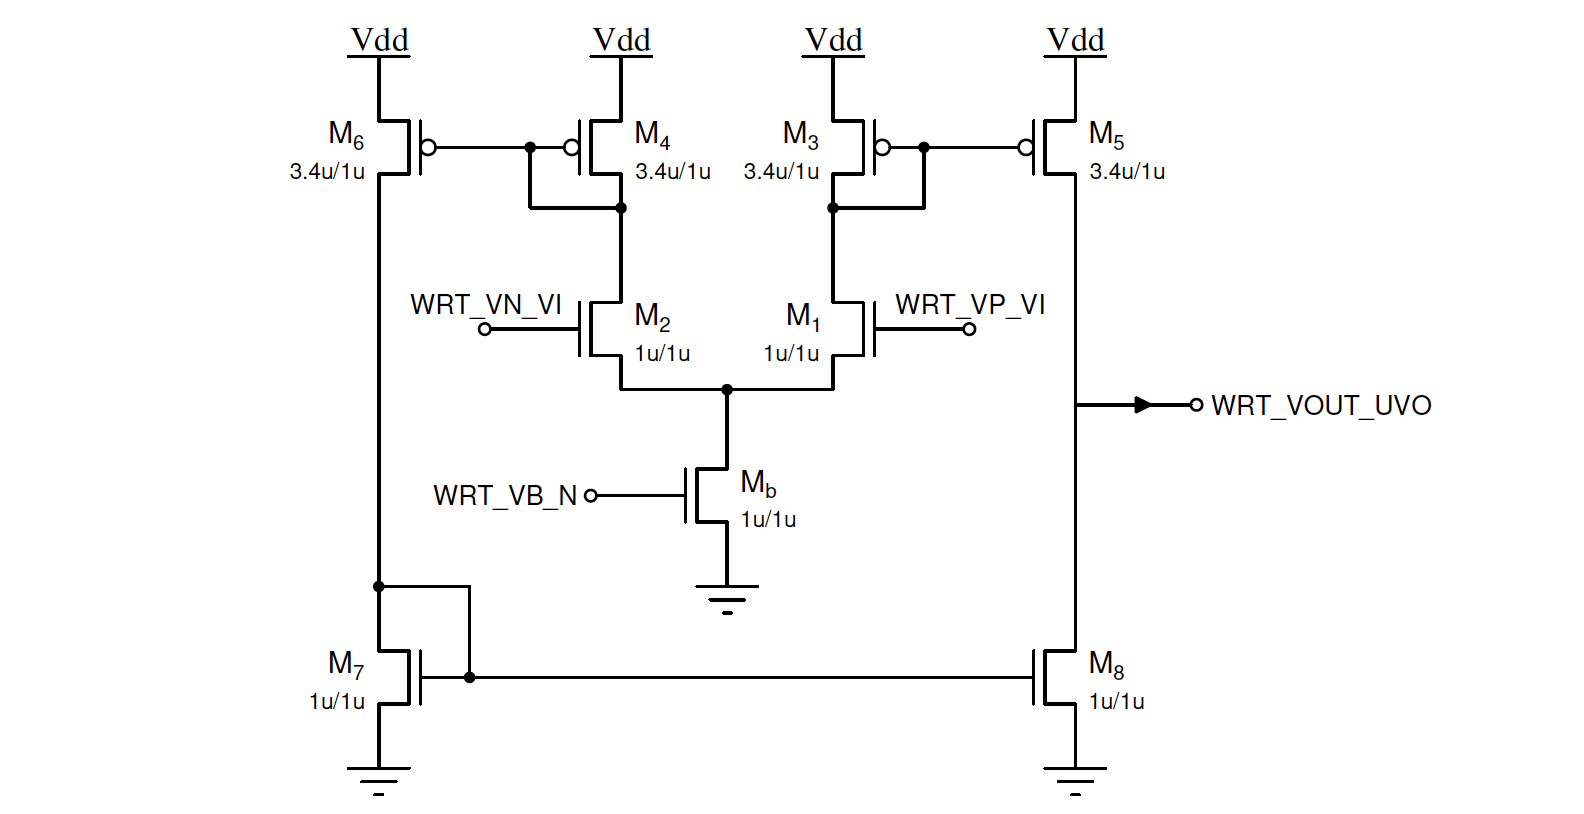

**$V_1$ = $V_p$ = WRT_VP_VI = AIN7**

**$V_2$ = $V_n$ = WRT_VN_VI = AIN8**

**$V_{out}$ = WRT_VOUT_UVO = ADC[11]**

## 5.1 Chip configuration

In [60]:
# configure wide-range TransAmp
p.send_coach_events([pyplane.Coach.generate_aerc_event( \
    pyplane.Coach.CurrentOutputSelect.SelectLine5, \
    pyplane.Coach.VoltageOutputSelect.SelectLine1, \
    pyplane.Coach.VoltageInputSelect.SelectLine2, \
    pyplane.Coach.SynapseSelect.NoneSelected, 0)])

## 5.2 Output voltage vs. input voltage

### 5.2.1 Basic measurement

* Set bias current $I_b$

In [61]:
 p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.WRT_VB_N, \
    pyplane.Coach.BiasType.N, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, 85)])

The bias current is set to

$I_b = w\dfrac{BG_{\text{fine}}}{256}I_{BG_{\text{master}}} = \dfrac{85}{256}\cdot 30\text{nA} \approx 9.961\text{nA}$.

* Set fixed value of $V_2$ (Hint: use get_set_voltage to get the real value set on the DAC)

In [62]:
p.set_voltage(pyplane.DacChannel.AIN8,0.9) # V2 = 0.9

0.8991203308105469

The input voltage is set to $V_2 = 0.9\text{V}$.

* Sweep $V_1$ and measure $V_{out}$ (Hint: use get_set_voltage to get the real value set on the DAC)

In [63]:
import numpy as np
import time

V1_sweep_ex5 = np.arange(0.2,1.6,0.01) # voltage V1 sweep range

V2_ex5_getset = p.get_set_voltage(pyplane.DacChannel.AIN8)

Vout_V1_sweep_ex5 = []
V1_sweep_ex5_getset = []

for n in range(len(V1_sweep_ex5)):
    
    p.set_voltage(pyplane.DacChannel.AIN7,V1_sweep_ex5[n]) #
    
    time.sleep(0.2) # settle time
    
    V1_sweep_ex5_getset.append(p.get_set_voltage(pyplane.DacChannel.AIN7))
    Vout_V1_sweep_ex5.append(p.read_voltage(pyplane.AdcChannel.AOUT11))
    
#print(V2_ex5_getset)
#print(V1_sweep_ex5_getset)
#print(Vout_V1_sweep_ex5)

* Plot raw data

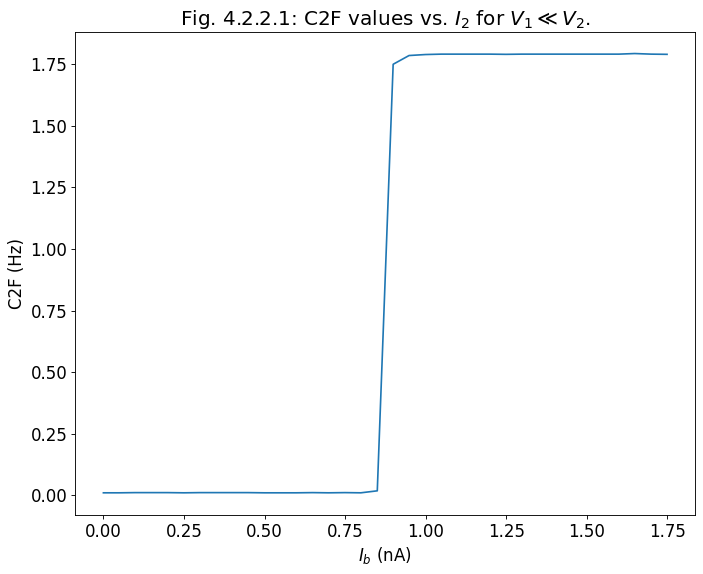

In [43]:
plt.figure(figsize=(10, 8), dpi=80)
plt.rcParams.update({'font.size': 15})
plt.xlabel('$I_b$ (nA)')
plt.ylabel('C2F (Hz)')
plt.title('Fig. 4.2.2.1: C2F values vs. $I_2$ for $V_1 \ll V_2$.')
plt.plot(V1_sweep_ex5_getset, Vout_V1_sweep_ex5)
plt.show()

* Save raw data

In [44]:
# if the data looks nice, save it!
data_Iout_UO_ex5_cal= [V1_sweep_ex5_getset, Vout_V1_sweep_ex5]
# save to csv file
np.savetxt('./data/Lab5_data_521.csv', data_Iout_UO_ex5_cal, delimiter=',')

### 5.2.2 Different bias currents

* Repeat 5.2.1 with another two bias currents and compare the three curves

In [24]:
BGfine = [25,55] 

V1_sweep_ex5 = np.arange(0,1.8,0.05) # voltage V1 sweep range

for i in range(len(BGfine)) :
    
    p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
        pyplane.Coach.BiasAddress.WRT_VB_N, \
        pyplane.Coach.BiasType.N, \
        pyplane.Coach.BiasGenMasterCurrent.I30nA, BGfine[i])])

    time.sleep(0.5)

    V2_ex5_getset = p.get_set_voltage(pyplane.DacChannel.AIN8)

    Vout_V1_sweep_ex5 = []
    V1_sweep_ex5_getset = []

    for n in range(len(V1_sweep_ex5)):
        
        p.set_voltage(pyplane.DacChannel.AIN7,V1_sweep_ex5[n]) #

        time.sleep(0.3) # settle time

        V1_sweep_ex5_getset.append(p.get_set_voltage(pyplane.DacChannel.AIN7))
        Vout_V1_sweep_ex5.append(p.read_voltage(pyplane.AdcChannel.AOUT11))
        

    data_Iout_UO_ex5_cal= [V1_sweep_ex5_getset, Vout_V1_sweep_ex5]
    ib=str(round(BGfine[i]*30/256,2))
    volt="0.9"
    filename="data/Lab5_data_522_"+ib+"_"+volt+".csv"
    np.savetxt(filename, data_Iout_UO_ex5_cal, delimiter=',')

In [55]:
data=["data/Lab5_data_522_2.93_0.9.csv", "data/Lab5_data_522_6.45_0.9.csv", './data/Lab5_data_521.csv', ]

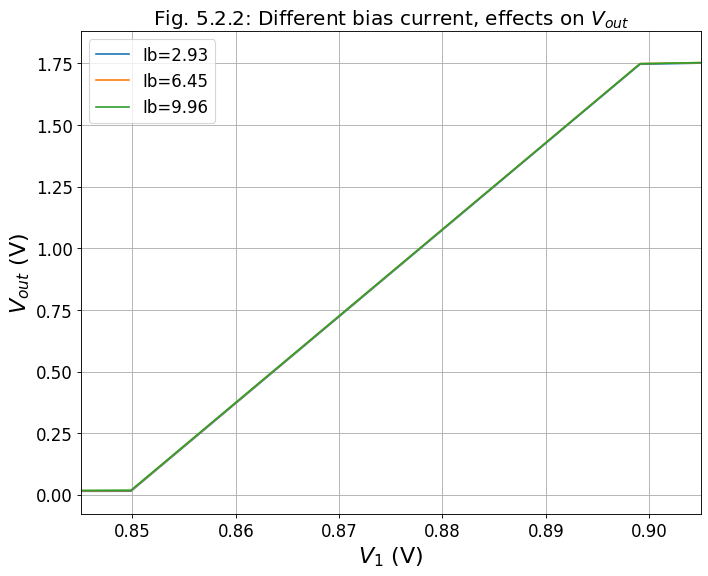

In [58]:
plt.figure(figsize=(10, 8), dpi=80)
for i in range(len(data)):
    V1_,Vout_ = np.loadtxt(data[i],  delimiter=',')
    plt.plot(V1_,Vout_)

plt.xlabel('$V_1$ (V)', {'size':20})
plt.ylabel('$V_{out}$ (V)', {'size':20})
plt.title('Fig. 5.2.2: Different bias current, effects on $V_{out}$')
plt.grid()
plt.xlim([0.845,0.905])
plt.legend(["Ib=2.93","Ib=6.45","Ib=9.96"])
plt.show()

**To conclude your observations:**

Experimentally, it has been found that the current bias does not effect the relationship between $V_{out}$ and $V_1$



### 5.2.3 Different fixed voltages $V_n$

* Repeat 5.2.1 with another two fixed voltages $V_2$ and compare the three curves

The bias current is switched back to $I_b \approx ??? \text{nA}$.

In [29]:
p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.WRT_VB_N, \
    pyplane.Coach.BiasType.N, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, 85)])

time.sleep(0.3)

In [31]:
voltage=[0.4, 0.9, 1.0] 

V1_sweep_ex5 = np.arange(0,1.8,0.05)

for j in range (len(voltage)):

    p.set_voltage(pyplane.DacChannel.AIN8, voltage[j]) # V2 = 0.8
    v2_real = p.get_set_voltage(pyplane.DacChannel.AIN8)
    print("V2 is set to {} V".format(v2_real))

    V2_ex5_getset = p.get_set_voltage(pyplane.DacChannel.AIN8)

    Vout_V1_sweep_ex5 = []
    V1_sweep_ex5_getset = []

    for n in range(len(V1_sweep_ex5)):

        p.set_voltage(pyplane.DacChannel.AIN7,V1_sweep_ex5[n]) #

        time.sleep(0.3) # settle time

        V1_sweep_ex5_getset.append(p.get_set_voltage(pyplane.DacChannel.AIN7))
        Vout_V1_sweep_ex5.append(p.read_voltage(pyplane.AdcChannel.AOUT11))

    # if the data looks nice, save it!
    data_Iout_UO_ex5_cal= [V1_sweep_ex5_getset, Vout_V1_sweep_ex5]
    # save to csv file
    ib=str(round(85*30/256,2))
    volt=str(round(voltage[j],2))
    filename="data/Lab5_data_523_"+ib+"_"+volt+".csv"
    np.savetxt(filename, data_Iout_UO_ex5_cal, delimiter=',')  

V2 is set to 0.399413526058197 V
V2 is set to 0.8991203308105469 V
V2 is set to 0.9994136095046997 V


In [45]:
data=["data/Lab5_data_523_9.96_0.4.csv", "data/Lab5_data_523_9.96_0.9.csv", './data/Lab5_data_523_9.96_1.0.csv', ]

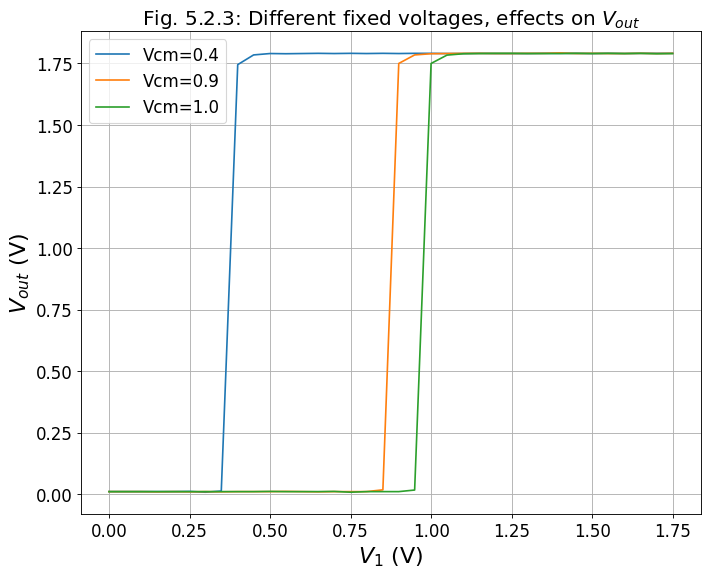

In [46]:
plt.figure(figsize=(10, 8), dpi=80)
for i in range(len(data)):
    V1_,Vout_ = np.loadtxt(data[i],  delimiter=',')
    plt.plot(V1_,Vout_)

plt.xlabel('$V_1$ (V)', {'size':20})
plt.ylabel('$V_{out}$ (V)', {'size':20})
plt.title('Fig. 5.2.3: Different fixed voltages, effects on $V_{out}$')
plt.grid()
plt.legend(["Vcm=0.4", "Vcm=0.9", "Vcm=1.0"])
plt.show()

**To conclude your observations:**

We denote that the observation given for the n-type 5T are also valid for the wide range TransAmp. 



## 5.3 Comparison with 5T transamps

Compare the $V_{out}$ vs $V_{pos}$ ($V_1$) curves of the three transamps with different $V_{neg}$ ($V_2$)

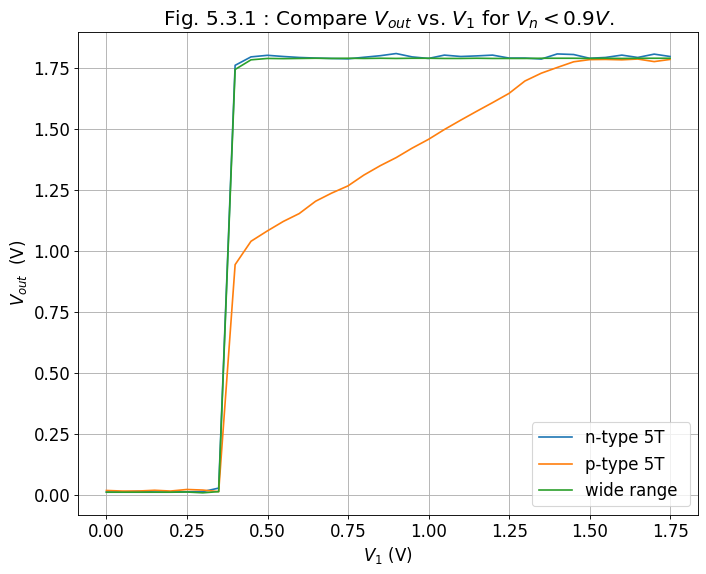

In [39]:
# fix Vn = ??? (<0.9V), Compare 𝑉𝑜𝑢𝑡 vs 𝑉𝑝os  

V1_sweep_ex3_getset1, Vout_V1_sweep_ex31 = np.loadtxt('./data/Lab5_data_333_9.961_0.4.csv',  delimiter=',') 
V1_sweep_ex4_getset2, Vout_V1_sweep_ex42 = np.loadtxt('./data/Lab5_data_433_9.96_0.4.csv',  delimiter=',') 
V1_sweep_ex5_getset3, Vout_V1_sweep_ex53 = np.loadtxt('./data/Lab5_data_523_9.96_0.4.csv',  delimiter=',') 

plt.figure(figsize=(10, 8), dpi=80)
plt.xlabel('$V_1$ (V)')
plt.ylabel('$V_{out}$  (V)')
plt.title('Fig. 5.3.1 : Compare $V_{out}$ vs. $V_1$ for $V_n < 0.9 V$.')
plt.plot(V1_sweep_ex3_getset1, Vout_V1_sweep_ex31,label="n-type 5T")
plt.plot(V1_sweep_ex4_getset2, Vout_V1_sweep_ex42,label="p-type 5T")
plt.plot(V1_sweep_ex5_getset3, Vout_V1_sweep_ex53,label="wide range ")
plt.legend()
plt.grid()
plt.show()

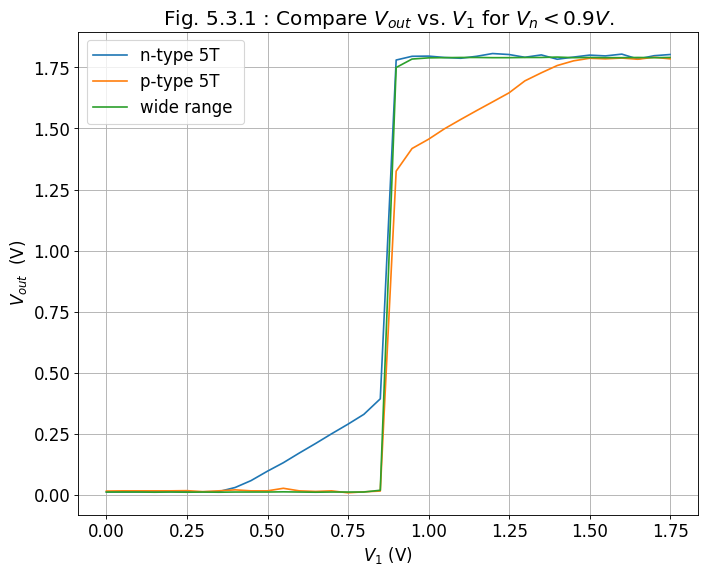

In [40]:
# fix Vn = 0.9V, Compare 𝑉𝑜𝑢𝑡 vs 𝑉𝑝os

V1_sweep_ex3_getset1, Vout_V1_sweep_ex31 = np.loadtxt('./data/Lab5_data_333_9.961_0.9.csv',  delimiter=',') 
V1_sweep_ex4_getset2, Vout_V1_sweep_ex42 = np.loadtxt('./data/Lab5_data_433_9.96_0.9.csv',  delimiter=',') 
V1_sweep_ex5_getset3, Vout_V1_sweep_ex53 = np.loadtxt('./data/Lab5_data_523_9.96_0.9.csv',  delimiter=',') 

plt.figure(figsize=(10, 8), dpi=80)
plt.xlabel('$V_1$ (V)')
plt.ylabel('$V_{out}$  (V)')
plt.title('Fig. 5.3.1 : Compare $V_{out}$ vs. $V_1$ for $V_n < 0.9 V$.')
plt.plot(V1_sweep_ex3_getset1, Vout_V1_sweep_ex31,label="n-type 5T")
plt.plot(V1_sweep_ex4_getset2, Vout_V1_sweep_ex42,label="p-type 5T")
plt.plot(V1_sweep_ex5_getset3, Vout_V1_sweep_ex53,label="wide range ")
plt.legend()
plt.grid()
plt.show()

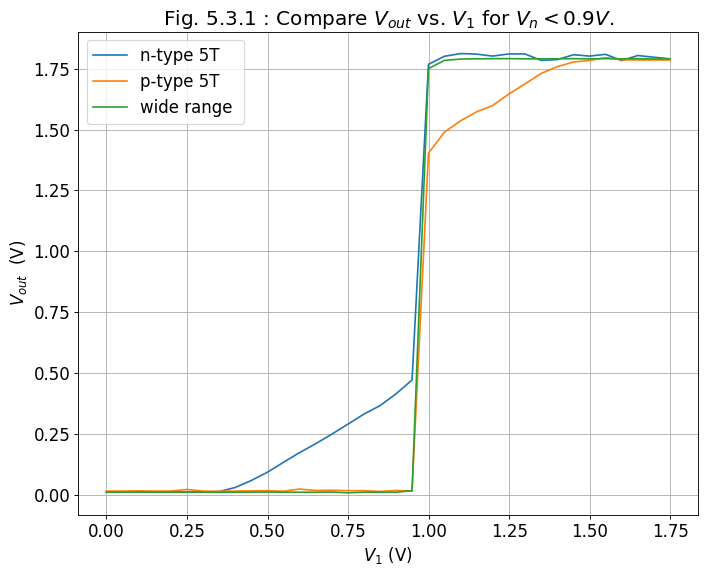

In [41]:
# fix Vn = ??? (>0.9V), Compare 𝑉𝑜𝑢𝑡 vs 𝑉𝑝os

V1_sweep_ex3_getset1, Vout_V1_sweep_ex31 = np.loadtxt('./data/Lab5_data_333_9.961_1.0.csv',  delimiter=',') 
V1_sweep_ex4_getset2, Vout_V1_sweep_ex42 = np.loadtxt('./data/Lab5_data_433_9.96_1.0.csv',  delimiter=',') 
V1_sweep_ex5_getset3, Vout_V1_sweep_ex53 = np.loadtxt('./data/Lab5_data_523_9.96_1.0.csv',  delimiter=',') 

plt.figure(figsize=(10, 8), dpi=80)
plt.xlabel('$V_1$ (V)')
plt.ylabel('$V_{out}$  (V)')
plt.title('Fig. 5.3.1 : Compare $V_{out}$ vs. $V_1$ for $V_n < 0.9 V$.')
plt.plot(V1_sweep_ex3_getset1, Vout_V1_sweep_ex31,label="n-type 5T")
plt.plot(V1_sweep_ex4_getset2, Vout_V1_sweep_ex42,label="p-type 5T")
plt.plot(V1_sweep_ex5_getset3, Vout_V1_sweep_ex53,label="wide range ")
plt.legend()
plt.grid()
plt.show()

**To conclude your observations:**

Contrarly to the other two circuits the voltage output of the wide range TransAmp grows linearly only when the voltage input difference is near zero. Measurements of the latter are also, overall, less noisy. 


# 6 Postlab

1. When we set the output voltage of the transconductance amplifier to a certain value between gnd and Vdd and measured its output current, we found that at some nonzero input voltage (the offset voltage) the output current was zero. Will we get a different input offset voltage if we change the output voltage? Explain why.

Yes, because the following equation must hold $V_{out}=A(V_1-V_2)$ where A is the open-circuit voltage gain .

2. What are the conditions for keeping $M_b$ in saturation for the P-type transamp? Do they differ from the N-type transamp?

Yes. $V_s\approx \kappa(min(V_1,V_2)+V_b)$

3. What are the advantages and disadvantages of the wide-output-range transconductance amplifier vs. a standard transconductance amplifier? Consider layout area, output voltage swing, offset voltage, current asymmetries, and the gain A. Why is the wide-output-range transamp better suited for construction of a high-gain single-stage amplifier? _Hint: think about the necessary symmetries between pairs of transistors._

wide-output-range transconductance amplifier (worta) vs. a standard transconductance amplifier (sta)

- layout area, 
- output voltage swing, 
- offset voltage, 
- current asymmetries,  
- the gain A. 

Why is the wide-output-range transamp better suited for construction of a high-gain single-stage amplifier? Hint: think about the necessary symmetries between pairs of transistors.

# 7 What we expect after lab 4 and lab5

Can you sketch a transamp, a wide range transamp, a current correlator, and a bump circuit
in both n- and p-type varieties? 

How does a differential pair work? How does the common-node voltage change with the
input voltages? How can you compute the differential tail currents from the subthreshold
equations, and how do you obtain the result in terms of the differential input voltage?
How does a current-correlator work? How does a bump circuit work?

The I-V characteristics of a transconductance amplifier below threshold. What’s the
functional difference between simple and wide-output-range transamp? The subthreshold
transconductance gm. The relation between gain A, transistor drain conductances gd, and
transconductances gm.

Can you reason through all the node voltages in these circuits? I.e., if we draw the circuit
and provide specific power supply and input voltages, can you reason to estimate all the
other node voltages, at least to first order approximations, assuming $\kappa$ = 1?

# 8 Congratulations

Wish you joy when you look back on your works, beautiful plots and all your efforts!